In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
%matplotlib inline
import pywt
import os
import time
import matplotlib.image as mpimg
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import feature
from imutils import paths
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC# "Support Vector Classifier"
from sklearn.preprocessing import StandardScaler
from scipy.ndimage.measurements import label
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

In [2]:
fishplate_images = 'C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/'
print("Fishplate images:")
print (len([name for name in os.listdir(fishplate_images) if os.path.isfile(os.path.join(fishplate_images, name))]))

fishplate_images1 = []

for i in range(len([name for name in os.listdir(fishplate_images) if os.path.isfile(os.path.join(fishplate_images, name))])):
    fishplate_images1.append(fishplate_images+"/"+str(i+1)+".JPG")


nonfishplate_images = 'C:/Users/hp/Desktop/Mod1-IITR/fishplate/neg/'
print("Non-fishplate images:")
print (len([name for name in os.listdir(nonfishplate_images) if os.path.isfile(os.path.join(nonfishplate_images, name))]))

nonfishplate_images1 = []
for i in range(len([name for name in os.listdir(nonfishplate_images) if os.path.isfile(os.path.join(nonfishplate_images, name))])):
    nonfishplate_images1.append(nonfishplate_images+"/"+str(i+1)+".JPG")


Fishplate images:
66
Non-fishplate images:
66


In [3]:
from skimage.io import imread, imshow
image = imread('C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/1.jpg', as_gray=True)

#checking image shape 
print('Shape of the image is = ',image.shape)

# image matrix
print('\n\nImage matrix\n\n',image)

# create features
features = np.reshape(image, (100*100))

# shape of feature array
print('\n\nShape of the feature array = ',features.shape)

print('\n\nFeature Array\n\n',features)

Shape of the image is =  (100, 100)


Image matrix

 [[0.40608627 0.40608627 0.39824314 ... 0.22236    0.23804627 0.25765412]
 [0.41785098 0.42569412 0.42177255 ... 0.1596149  0.17137961 0.19490902]
 [0.42961569 0.44530196 0.44922353 ... 0.12039922 0.12432078 0.13608549]
 ...
 [0.46206667 0.51304706 0.46598824 ... 0.41451686 0.43412471 0.41059529]
 [0.50520392 0.50912549 0.42677255 ... 0.42628157 0.39490902 0.34000706]
 [0.37971373 0.36402745 0.28951765 ... 0.39883059 0.33608549 0.26157569]]


Shape of the feature array =  (10000,)


Feature Array

 [0.40608627 0.40608627 0.39824314 ... 0.39883059 0.33608549 0.26157569]


In [4]:
def waveleteTransform(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = np.float32(img)
    img /= 255

    coeffs2 = pywt.dwt2(img, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    fig = plt.figure()
    for i, a in enumerate([LL]):
        ax = fig.add_subplot(1, 1, i + 1)
        ax.imshow(a, cmap=plt.cm.gray)
#     features = img.astype(np.uint8)

    return features

In [5]:
def extract_features(imgs):

    features = []

    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        
        wavelet_features = []
        for channel in range(feature_image.shape[2]):
            wavelet_features.append(waveleteTransform(image))
        wavelet_features = np.ravel(wavelet_features)        
        
        # Append the new feature vector to the features list
        features.append(wavelet_features)
    # Return list of feature vectors
    return features

<ipython-input-4-1f32568d91da>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


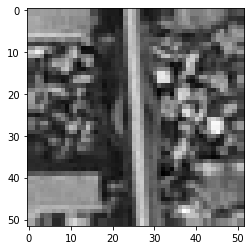

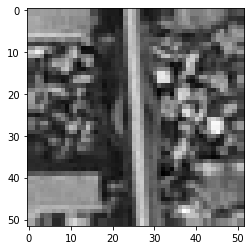

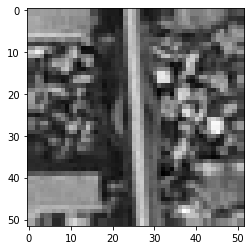

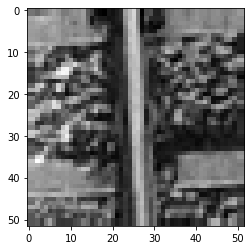

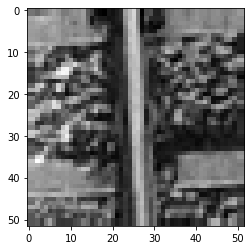

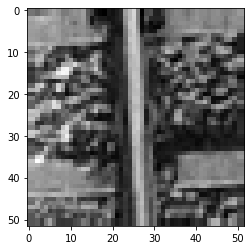

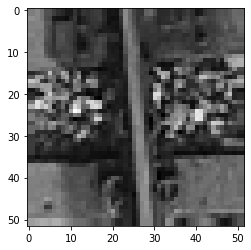

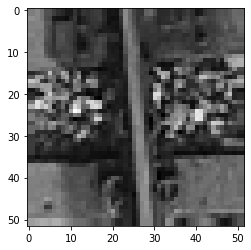

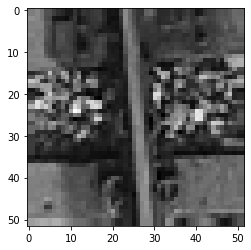

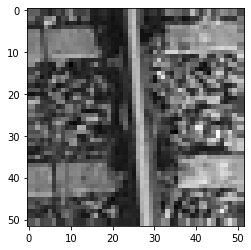

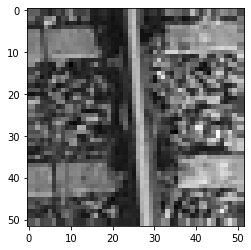

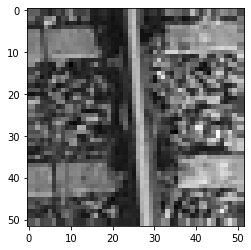

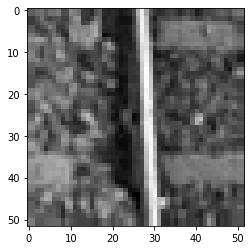

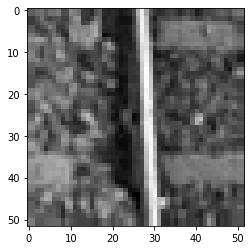

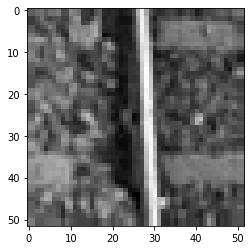

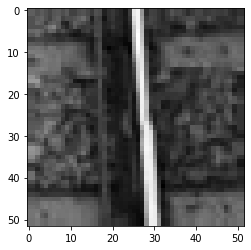

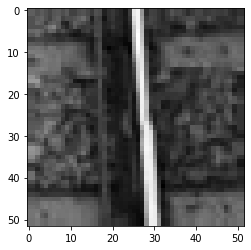

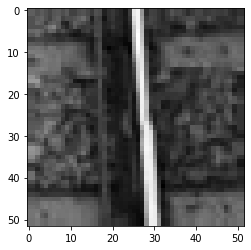

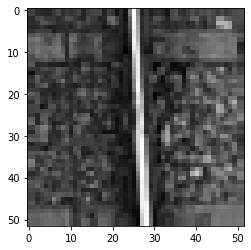

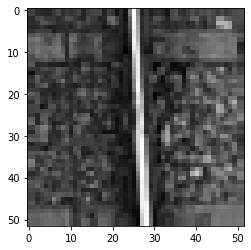

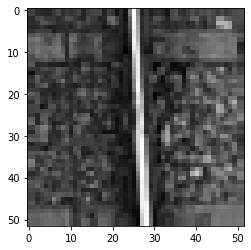

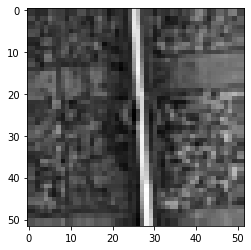

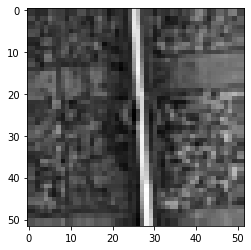

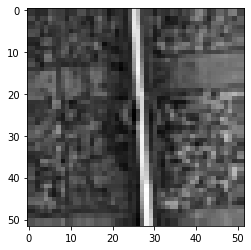

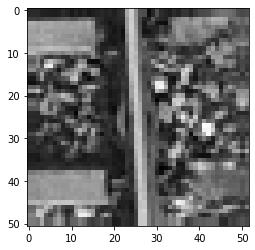

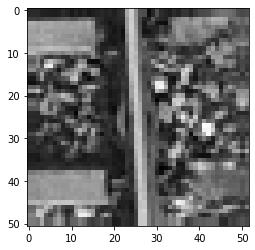

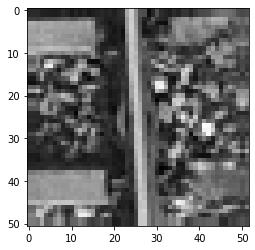

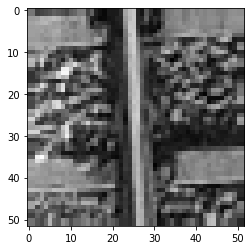

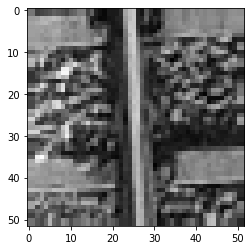

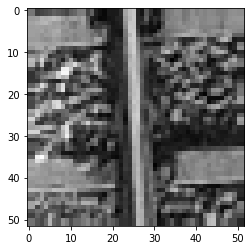

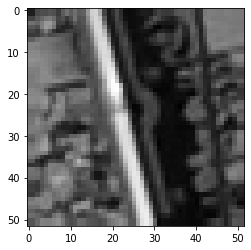

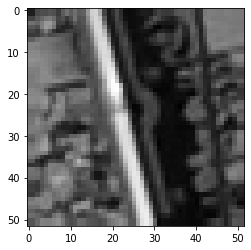

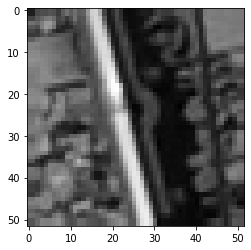

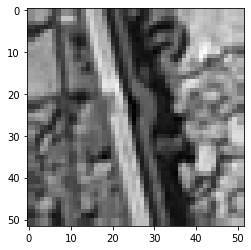

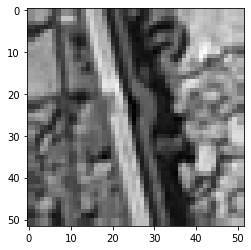

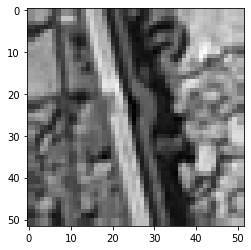

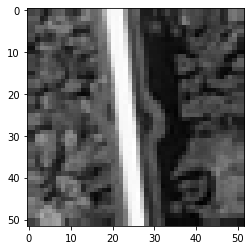

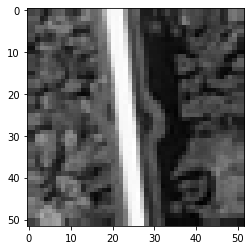

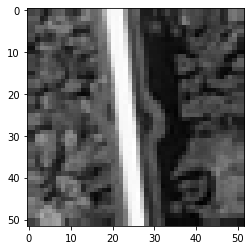

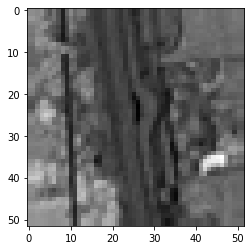

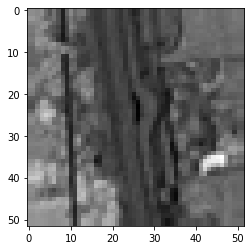

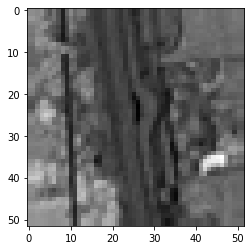

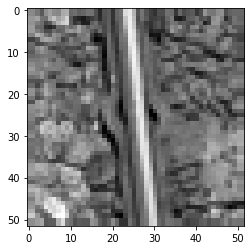

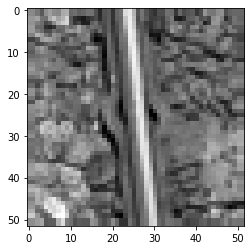

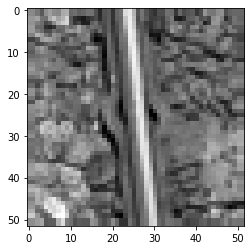

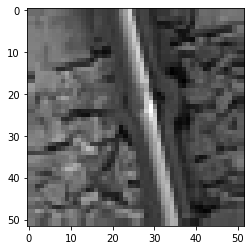

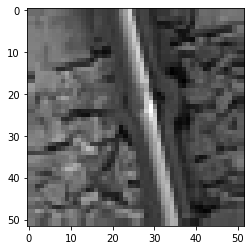

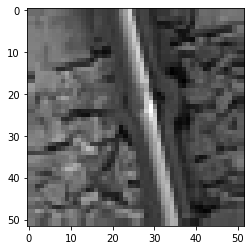

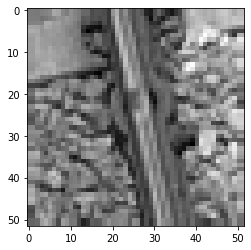

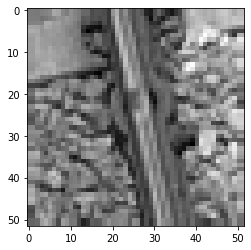

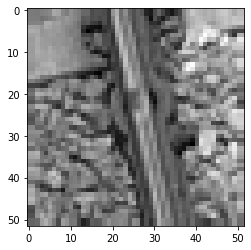

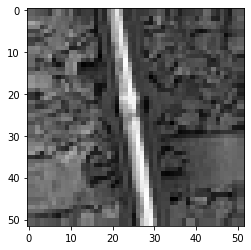

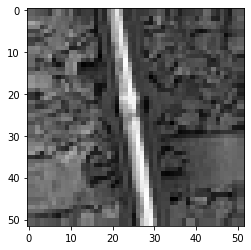

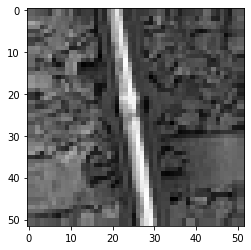

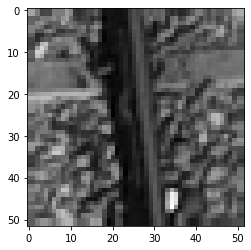

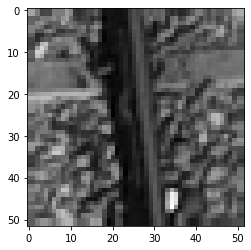

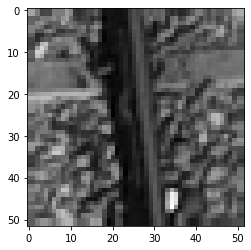

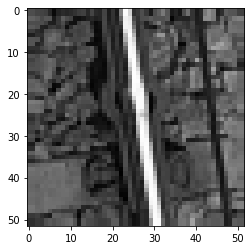

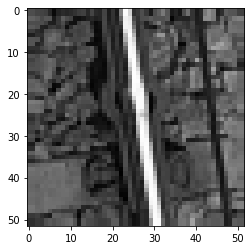

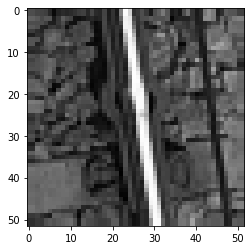

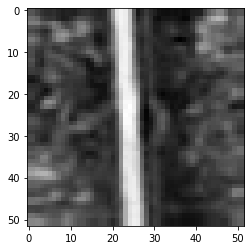

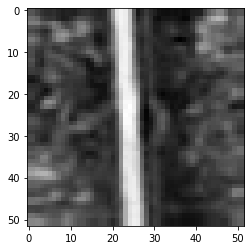

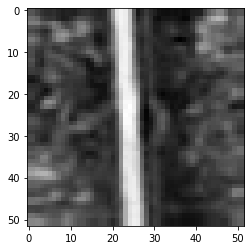

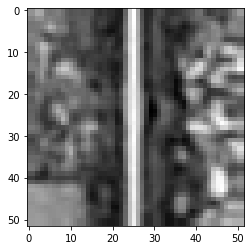

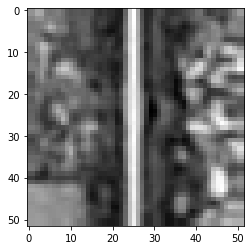

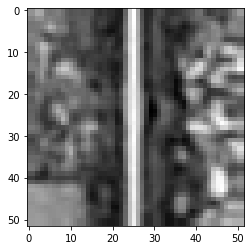

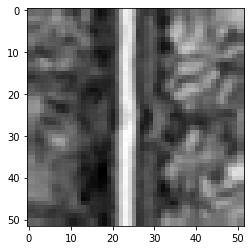

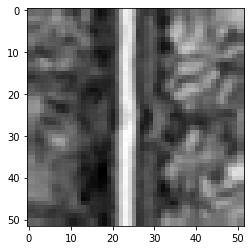

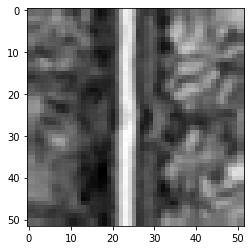

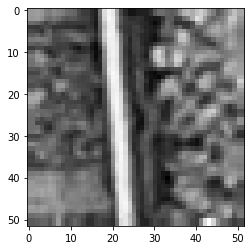

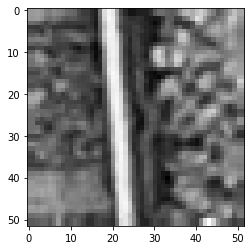

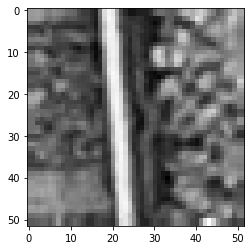

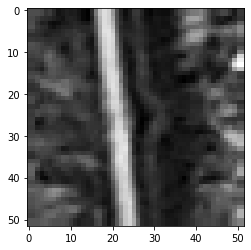

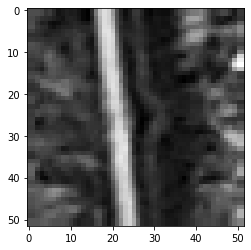

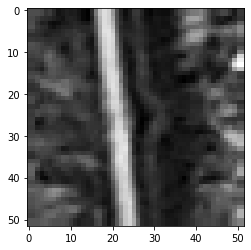

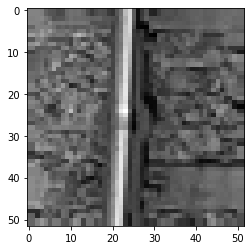

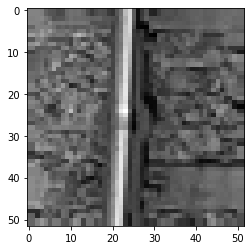

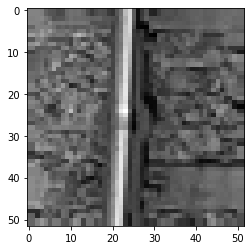

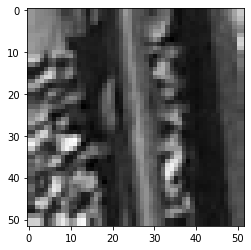

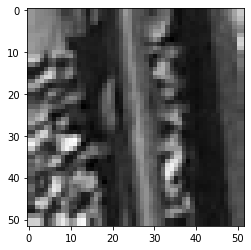

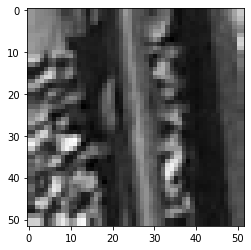

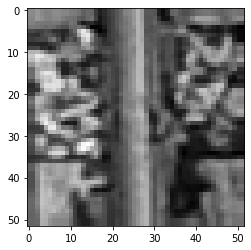

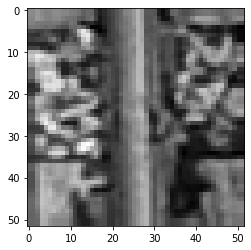

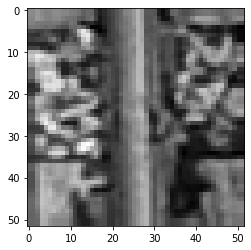

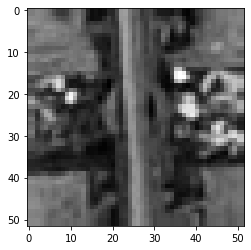

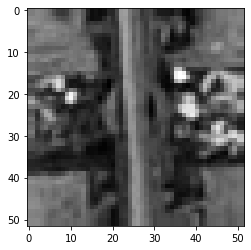

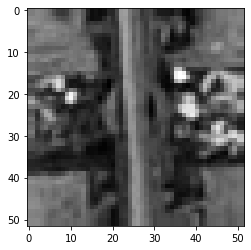

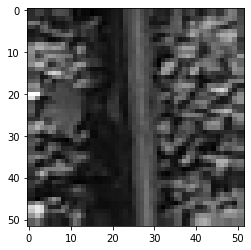

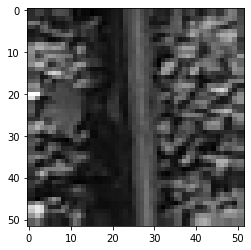

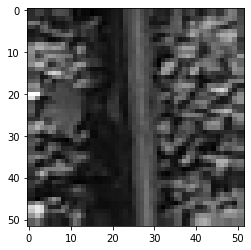

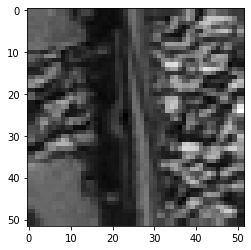

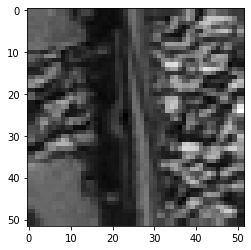

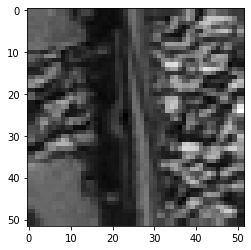

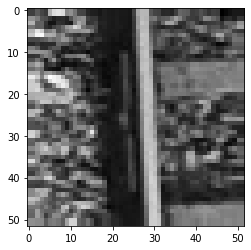

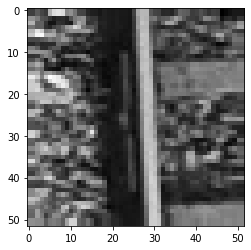

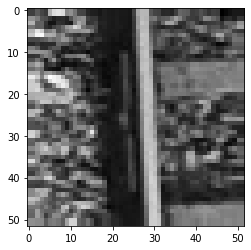

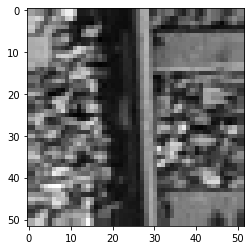

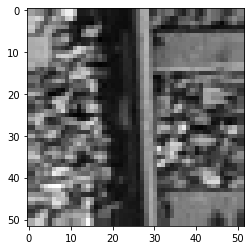

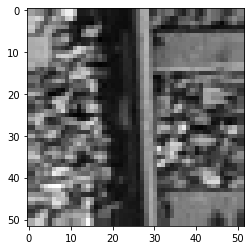

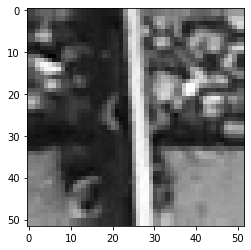

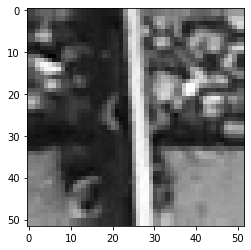

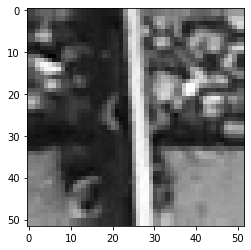

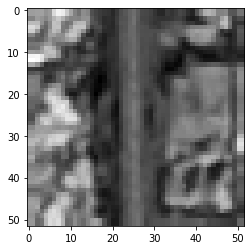

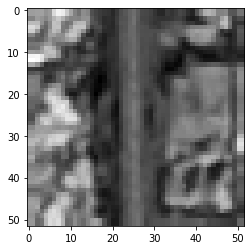

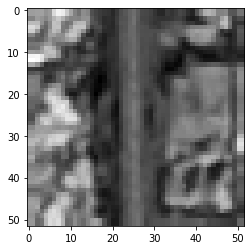

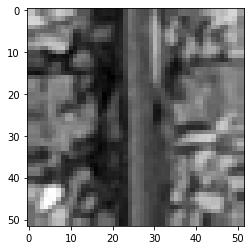

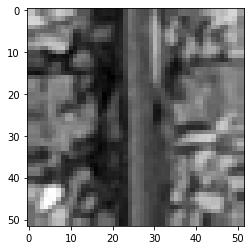

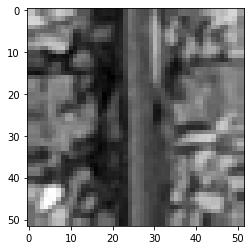

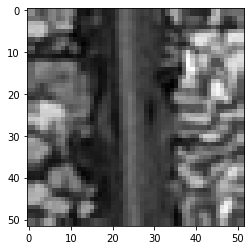

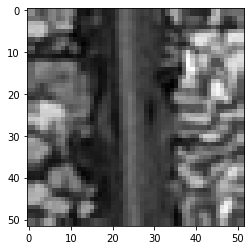

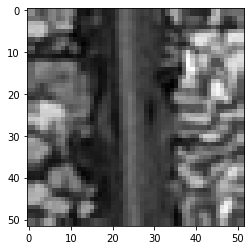

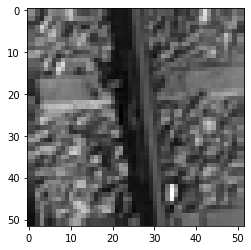

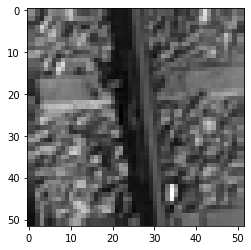

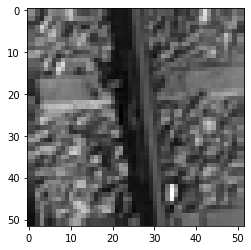

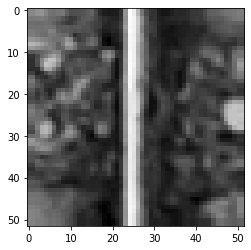

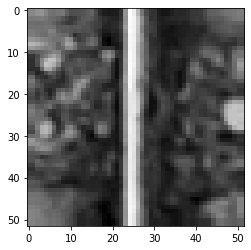

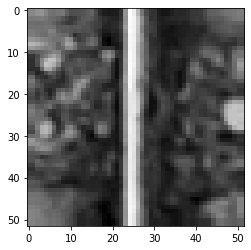

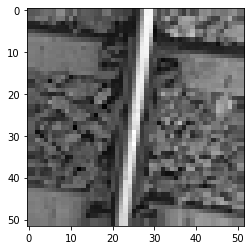

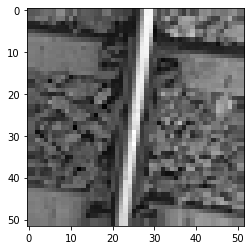

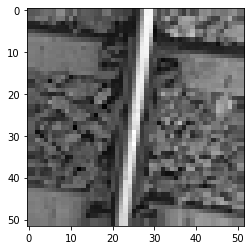

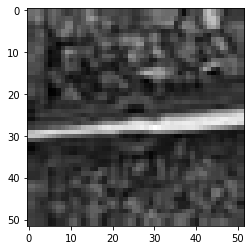

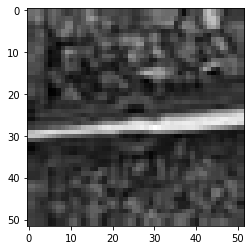

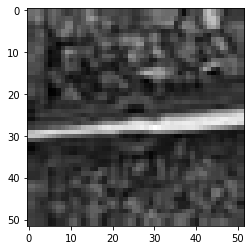

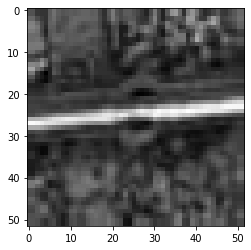

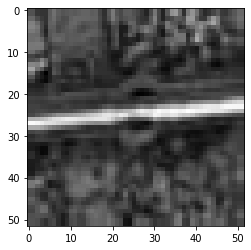

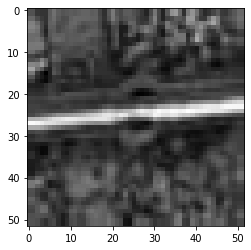

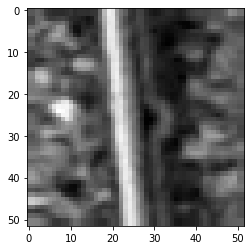

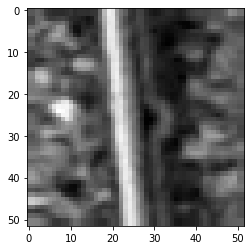

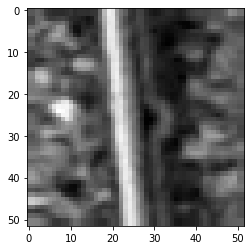

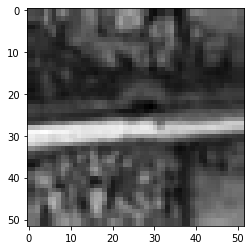

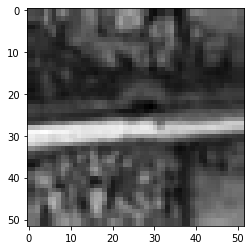

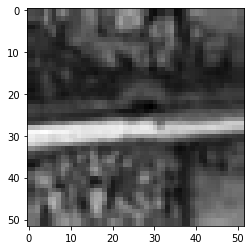

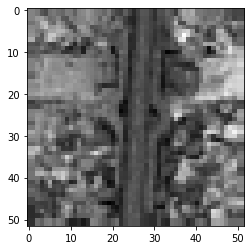

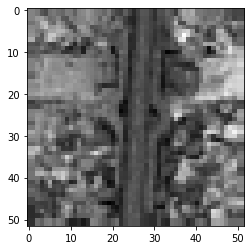

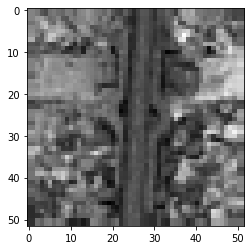

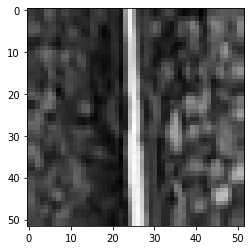

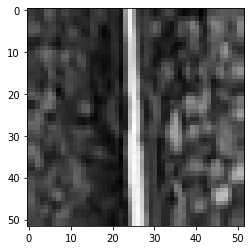

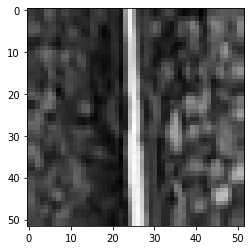

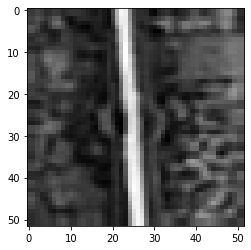

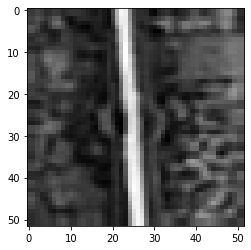

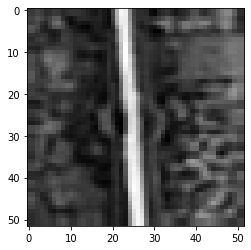

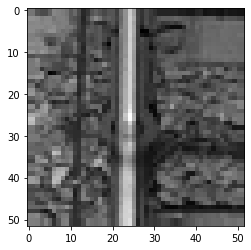

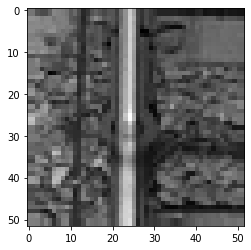

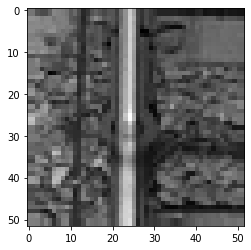

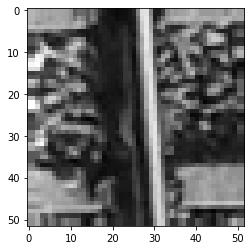

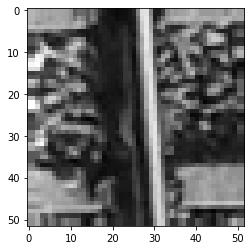

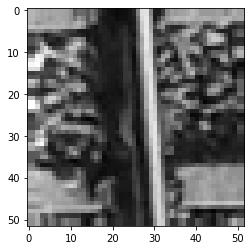

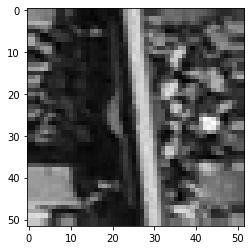

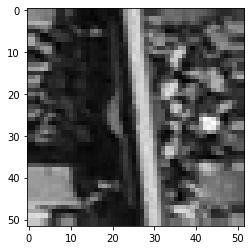

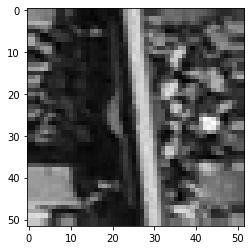

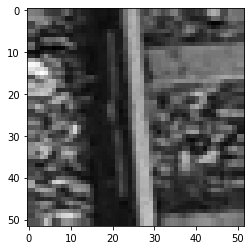

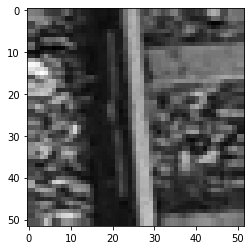

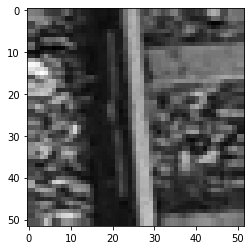

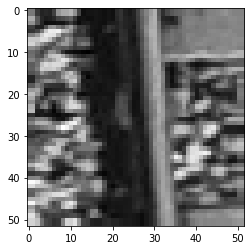

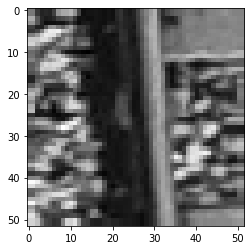

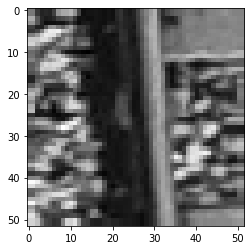

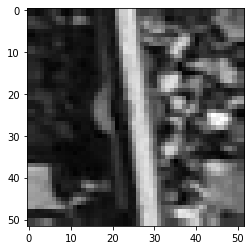

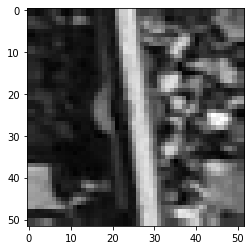

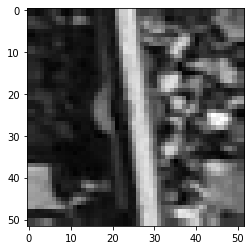

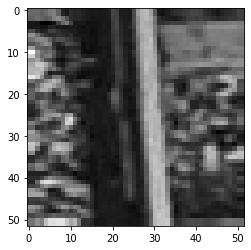

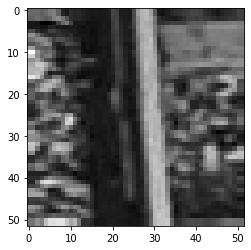

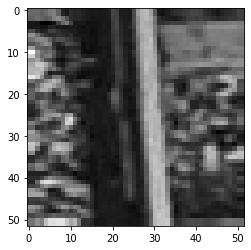

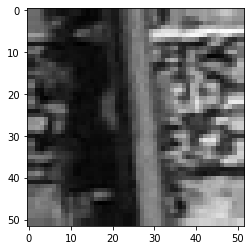

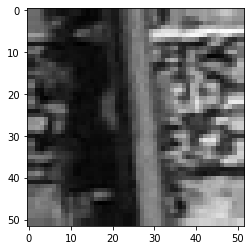

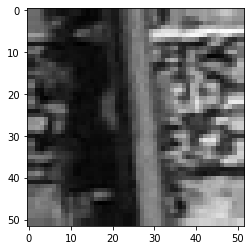

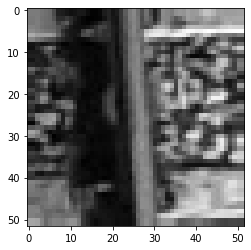

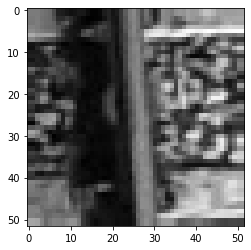

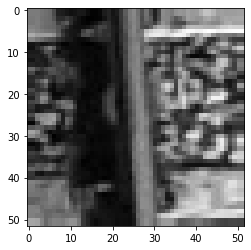

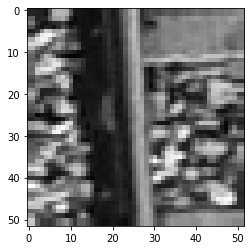

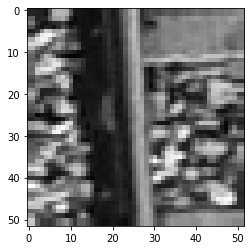

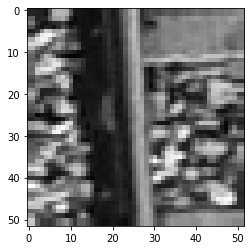

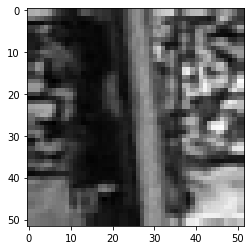

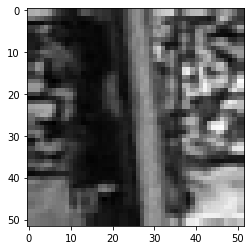

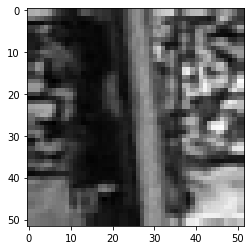

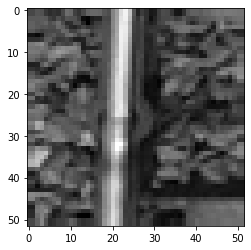

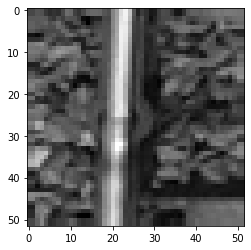

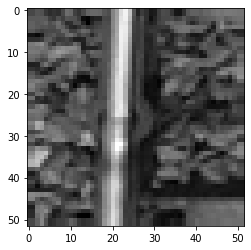

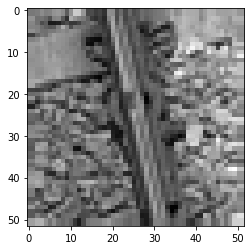

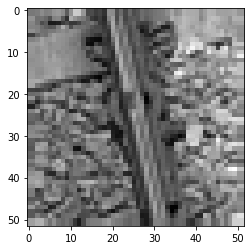

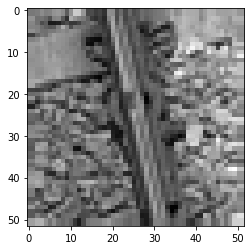

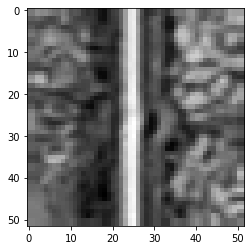

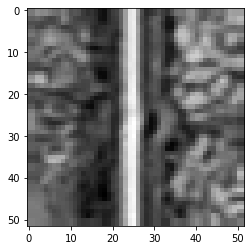

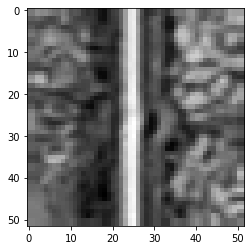

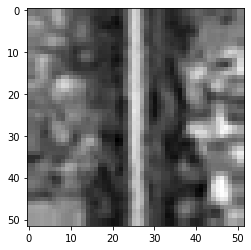

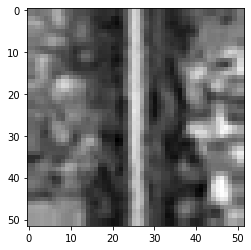

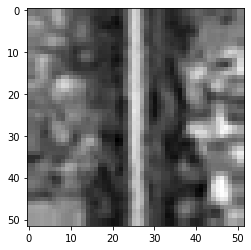

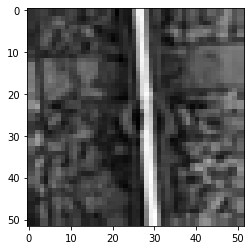

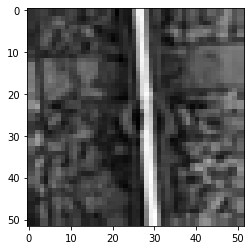

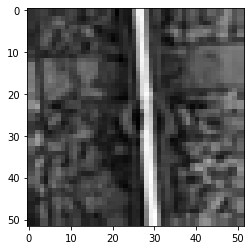

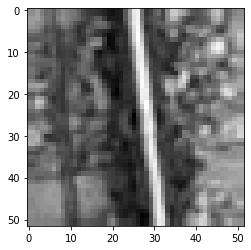

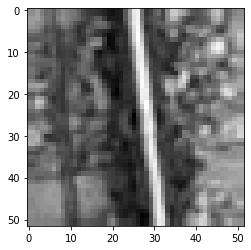

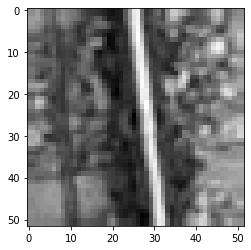

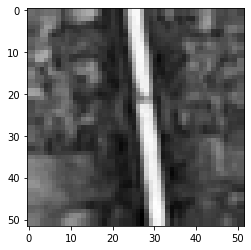

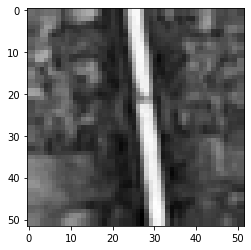

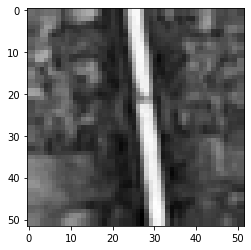

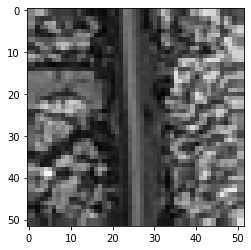

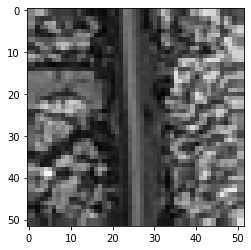

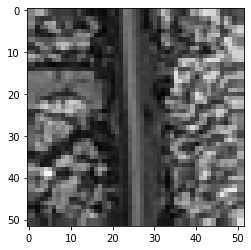

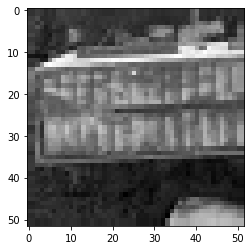

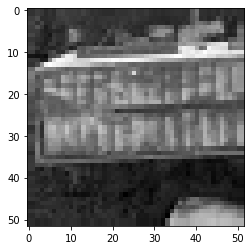

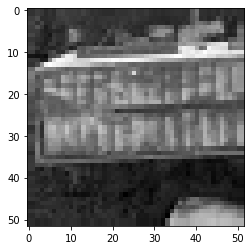

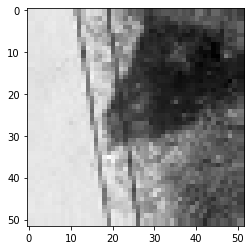

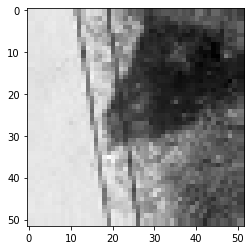

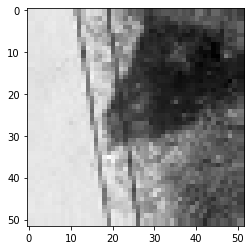

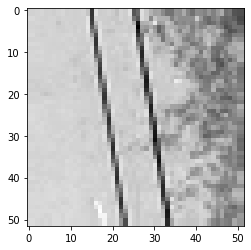

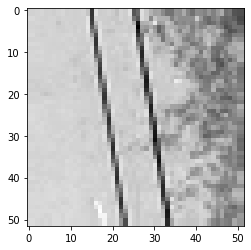

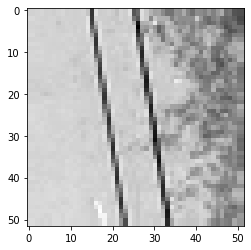

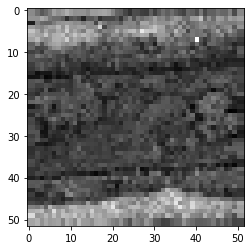

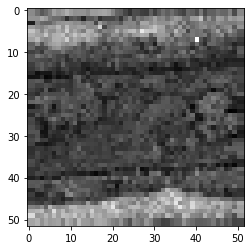

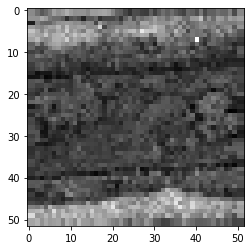

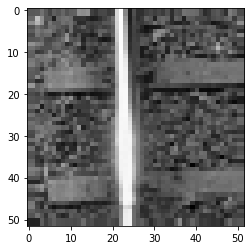

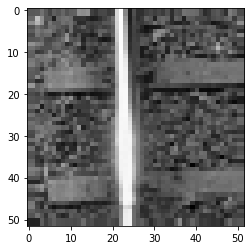

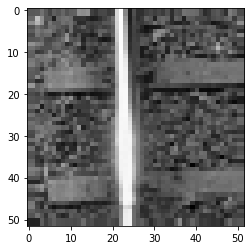

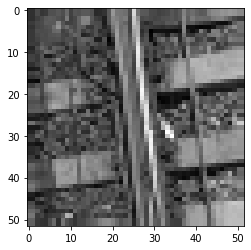

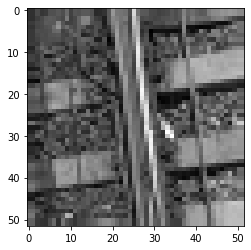

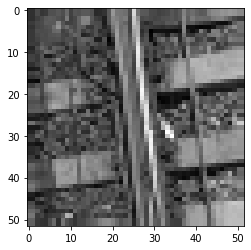

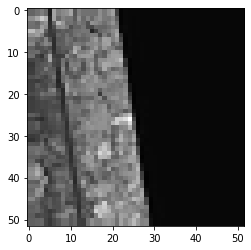

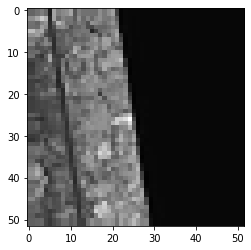

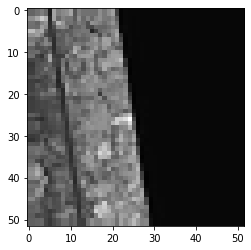

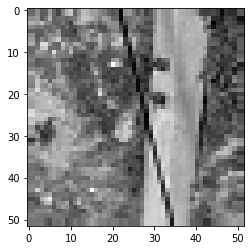

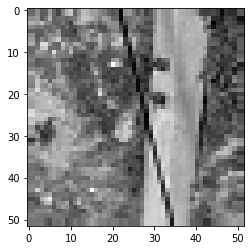

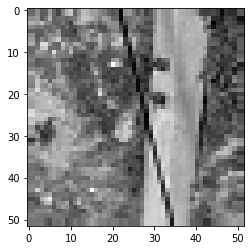

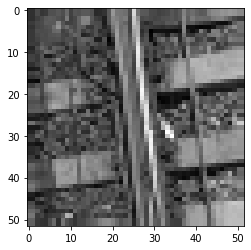

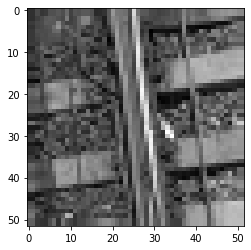

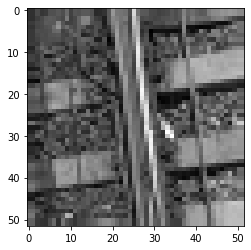

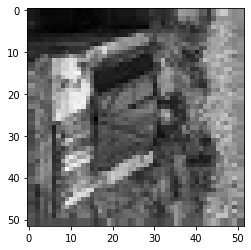

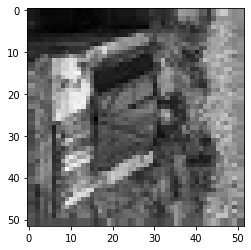

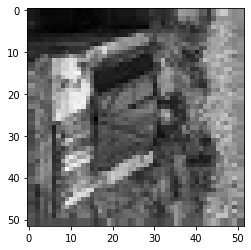

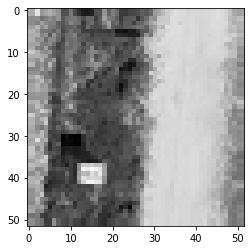

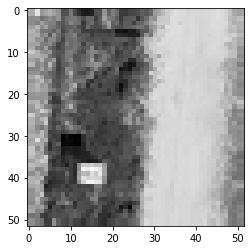

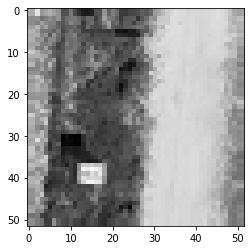

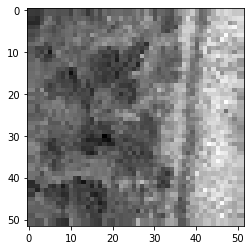

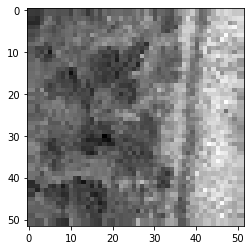

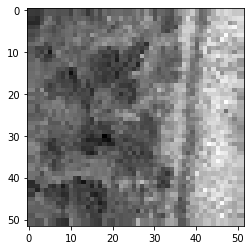

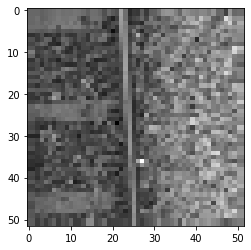

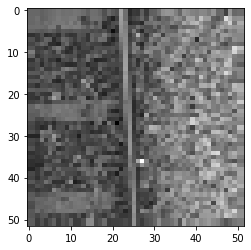

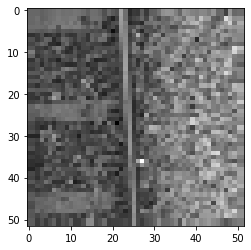

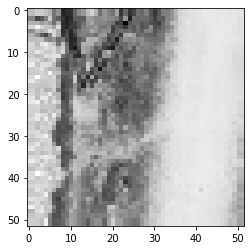

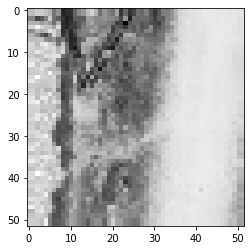

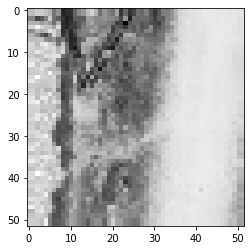

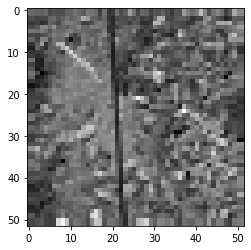

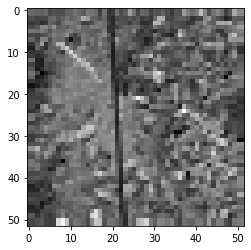

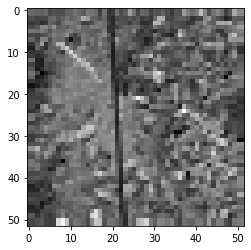

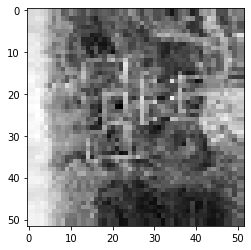

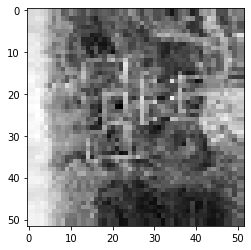

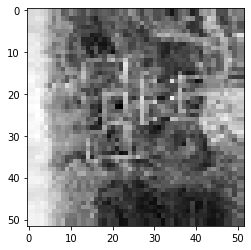

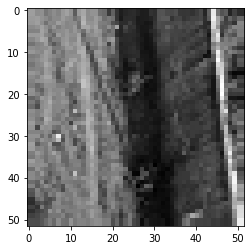

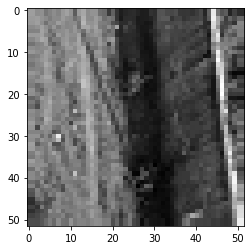

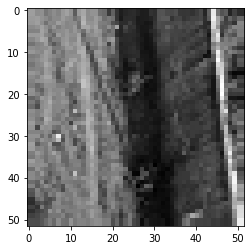

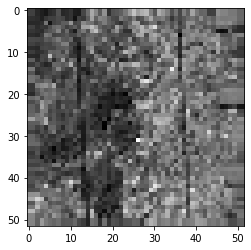

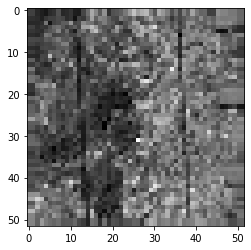

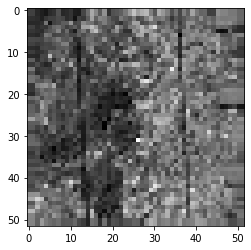

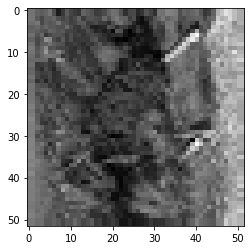

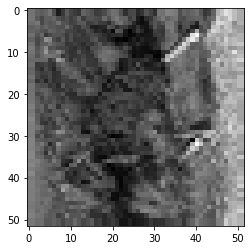

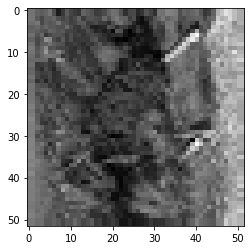

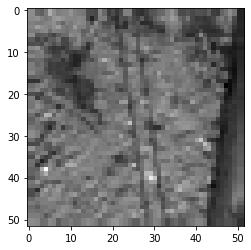

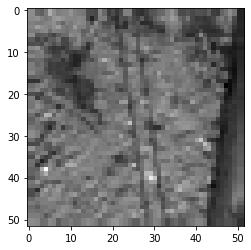

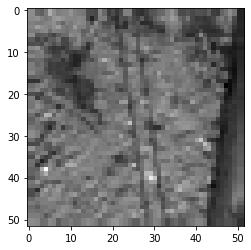

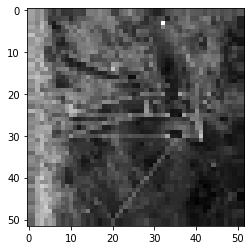

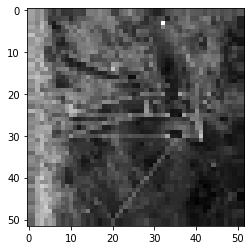

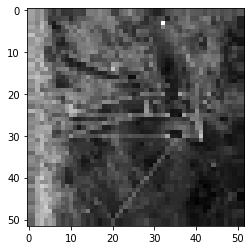

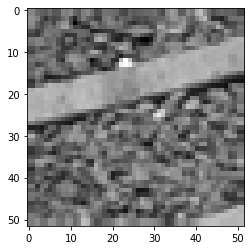

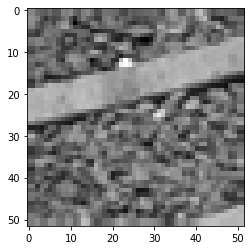

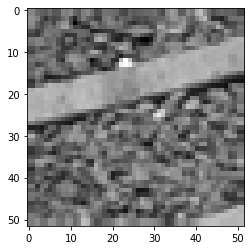

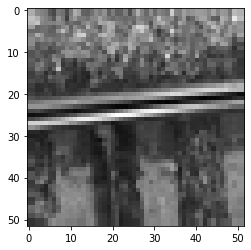

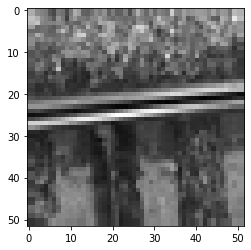

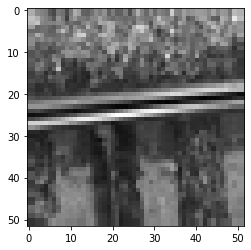

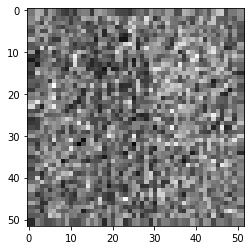

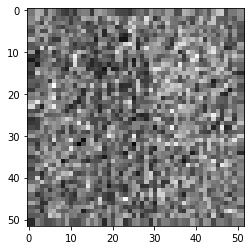

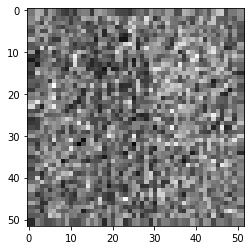

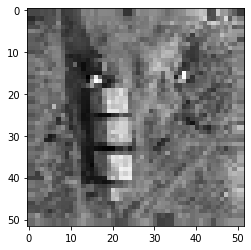

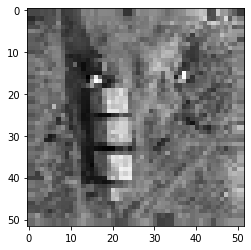

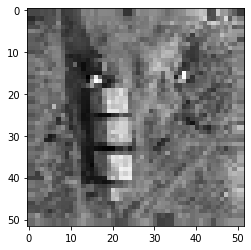

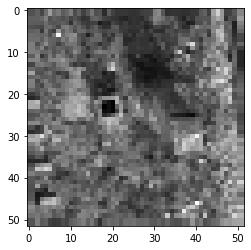

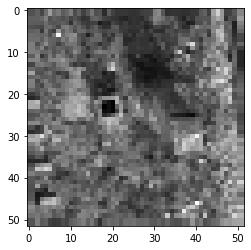

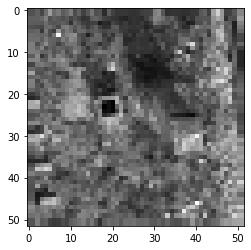

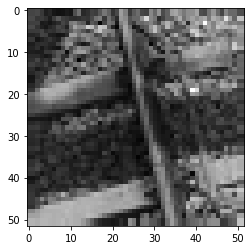

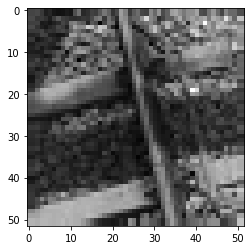

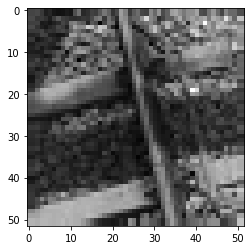

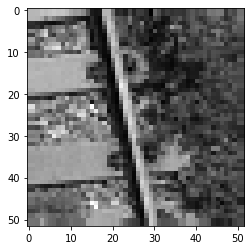

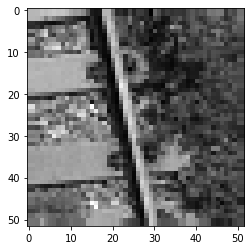

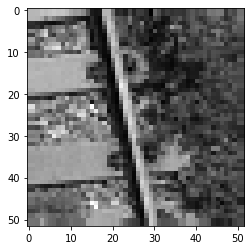

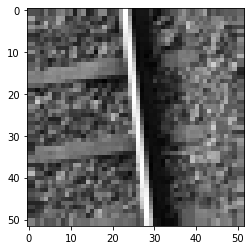

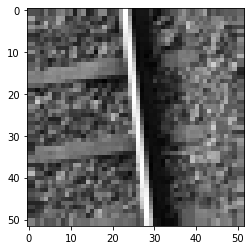

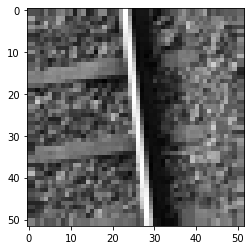

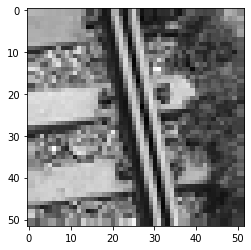

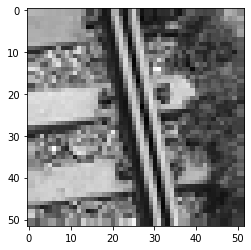

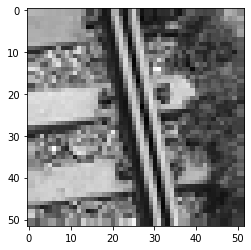

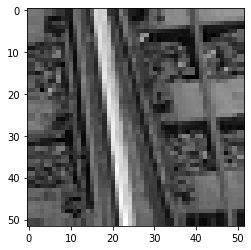

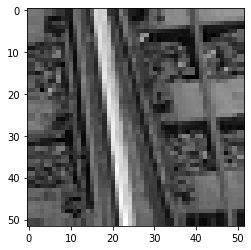

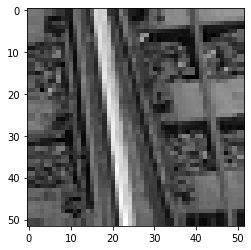

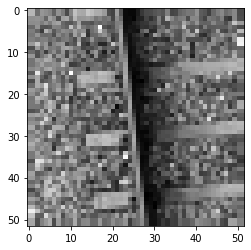

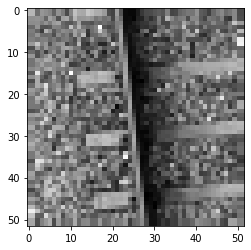

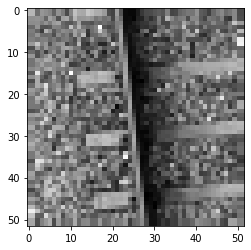

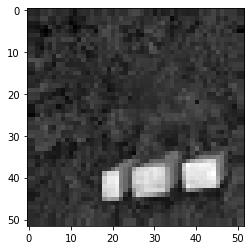

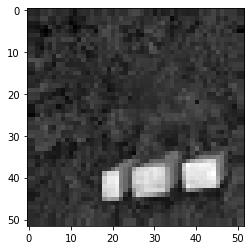

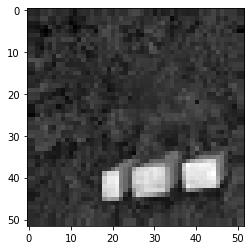

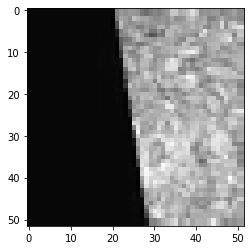

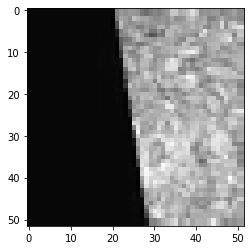

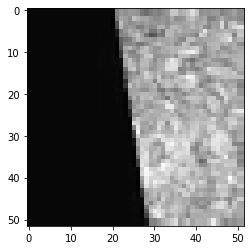

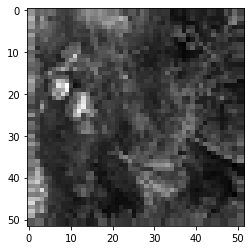

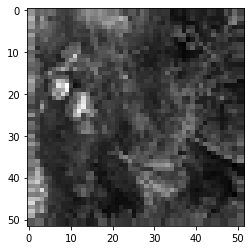

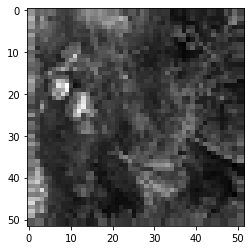

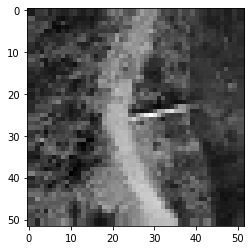

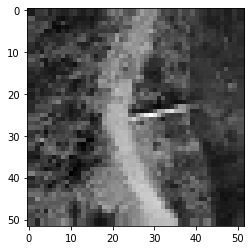

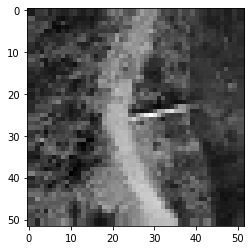

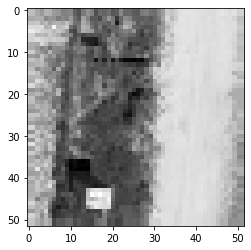

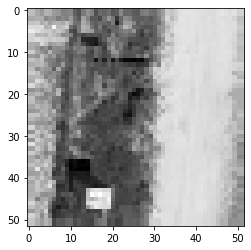

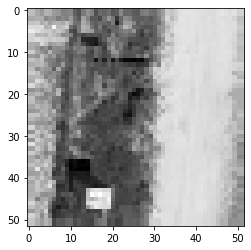

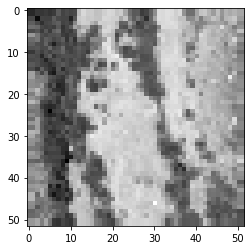

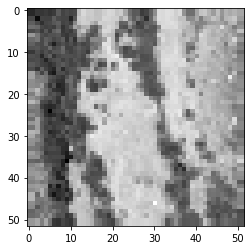

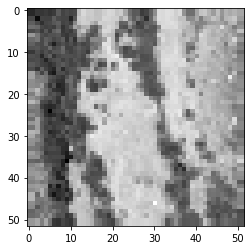

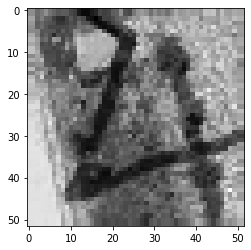

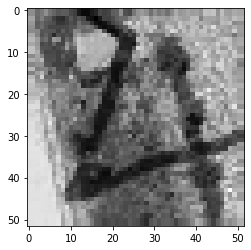

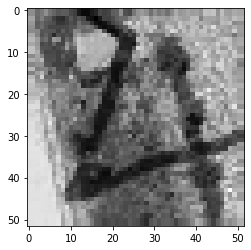

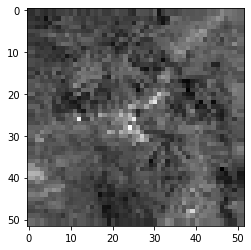

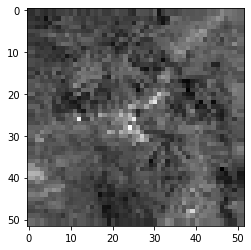

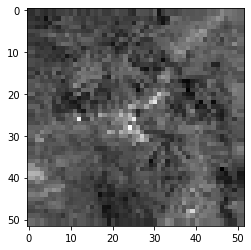

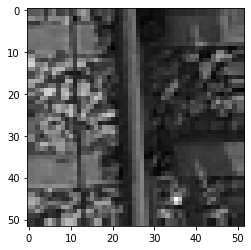

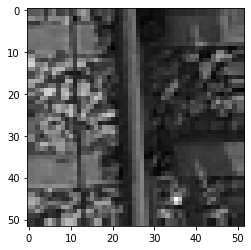

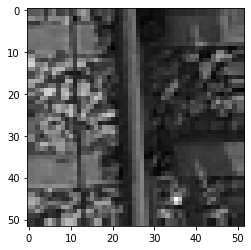

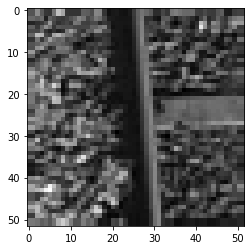

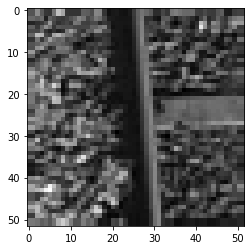

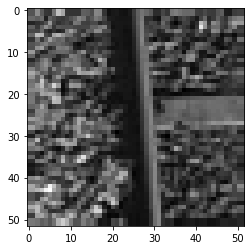

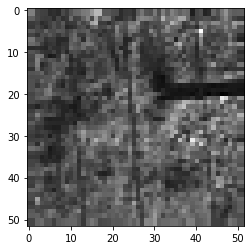

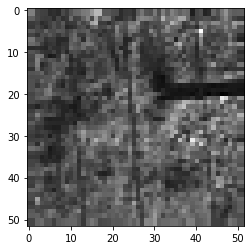

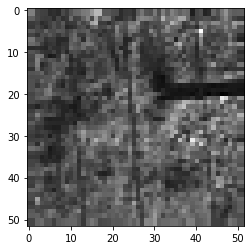

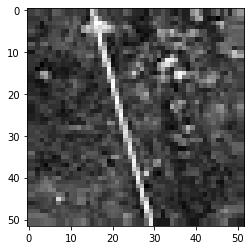

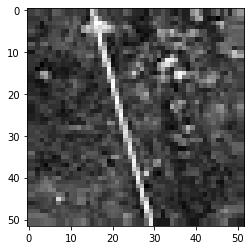

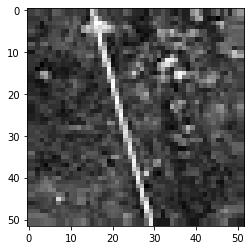

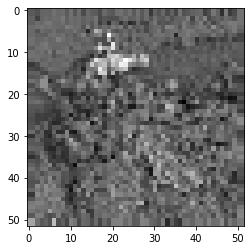

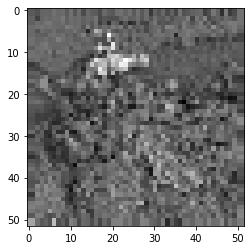

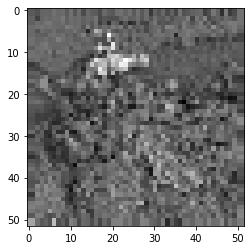

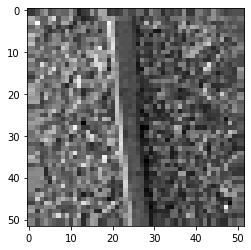

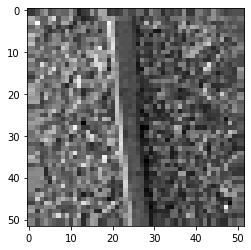

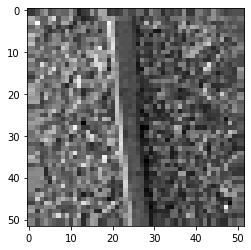

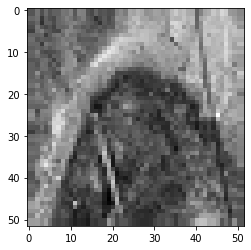

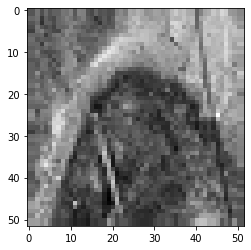

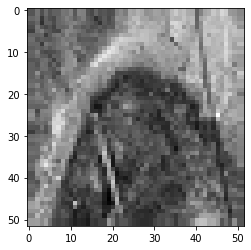

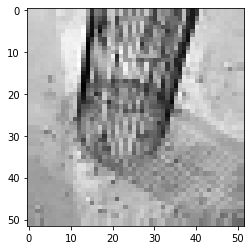

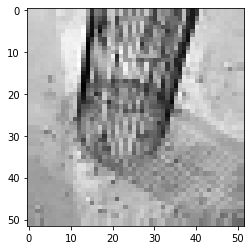

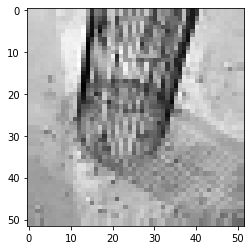

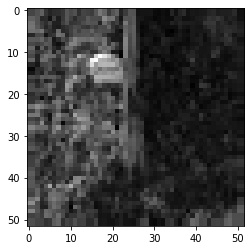

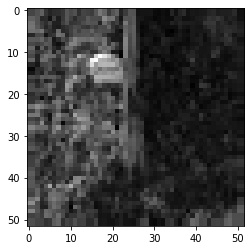

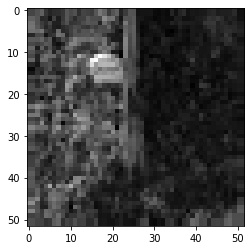

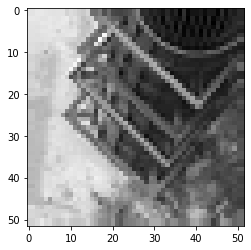

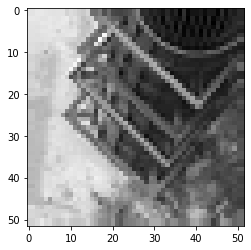

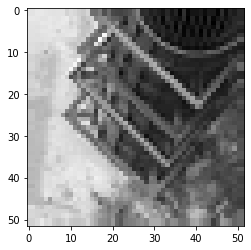

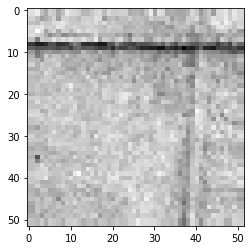

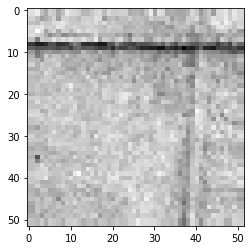

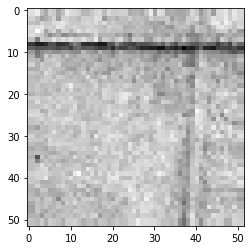

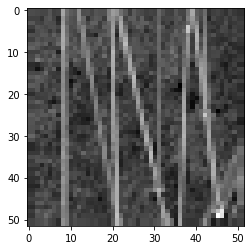

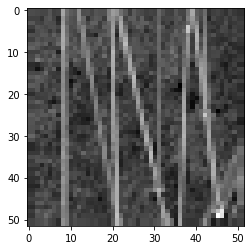

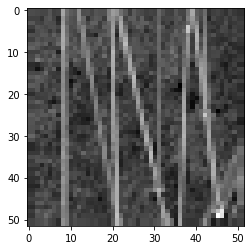

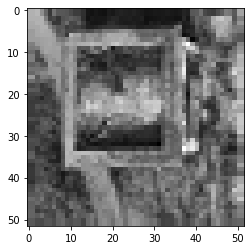

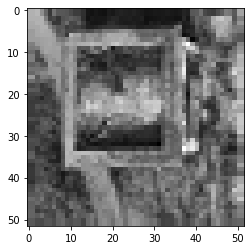

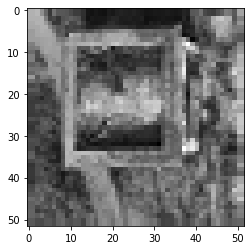

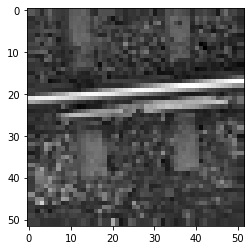

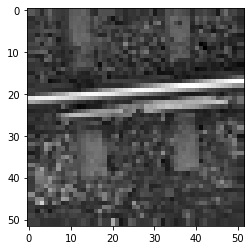

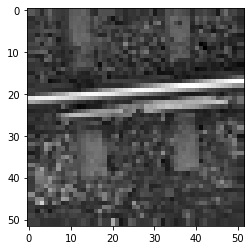

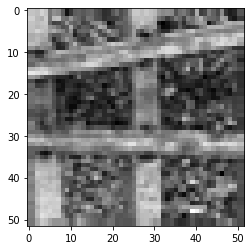

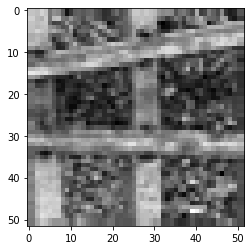

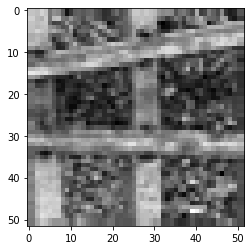

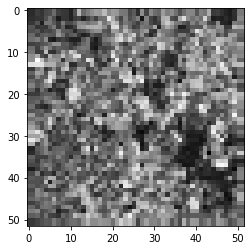

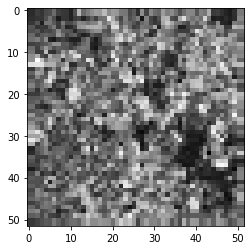

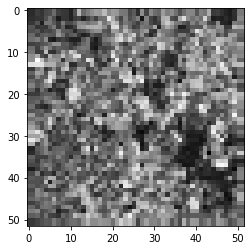

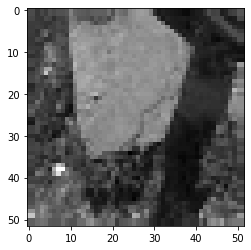

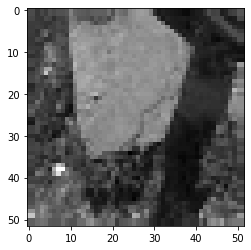

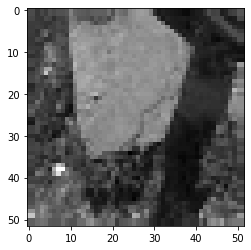

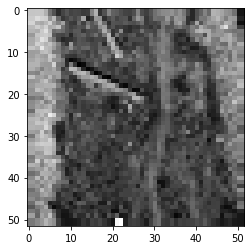

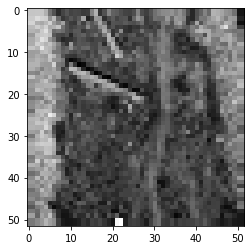

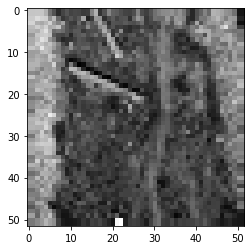

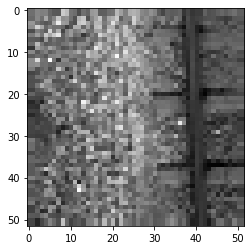

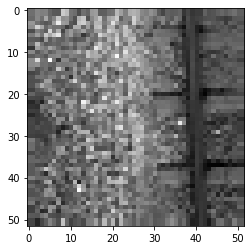

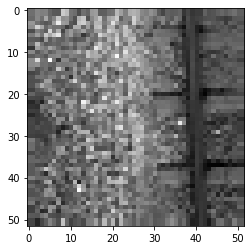

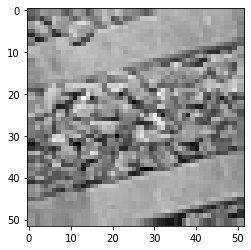

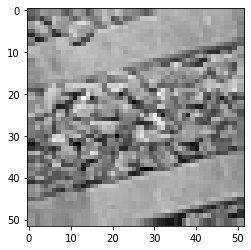

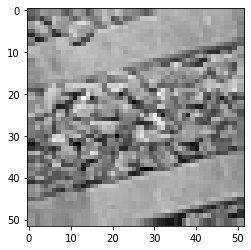

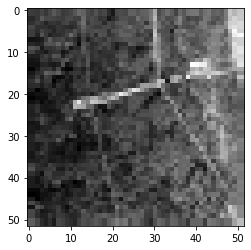

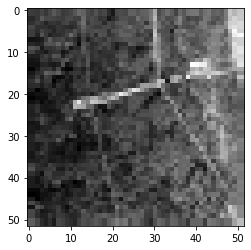

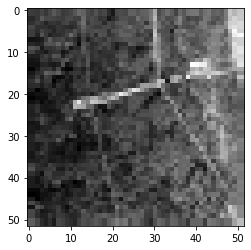

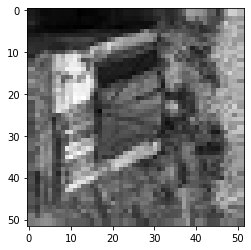

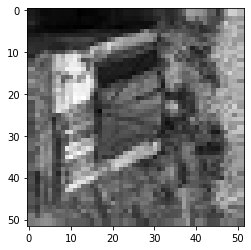

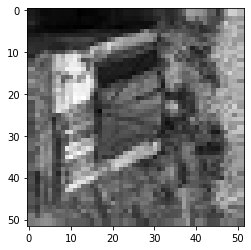

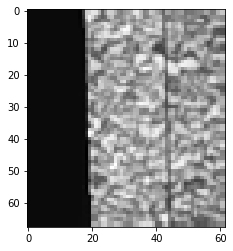

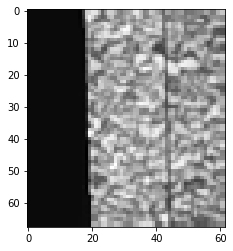

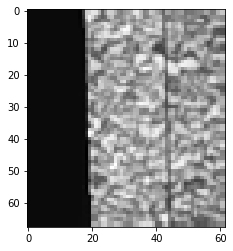

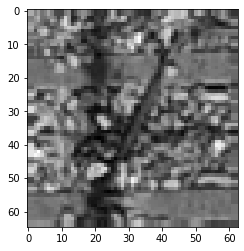

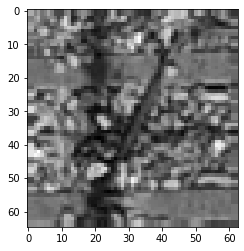

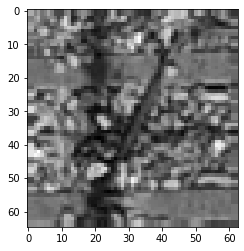

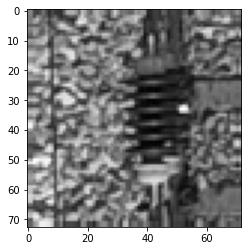

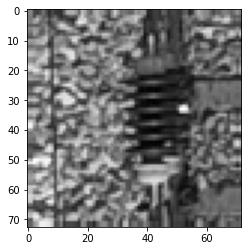

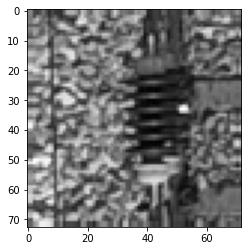

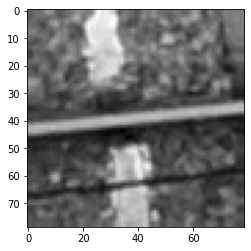

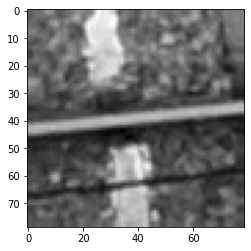

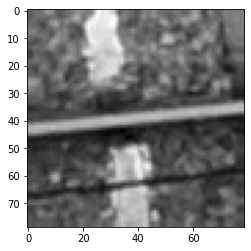

In [6]:
fishplate_features = extract_features(fishplate_images1)                    

notfishplate_features = extract_features(nonfishplate_images1)

In [7]:
X = np.vstack((fishplate_features, notfishplate_features))
print(len(fishplate_features))
print(len(notfishplate_features))

print(X)
print(X.shape)

66
66
[[0.40608627 0.40608627 0.39824314 ... 0.39883059 0.33608549 0.26157569]
 [0.40608627 0.40608627 0.39824314 ... 0.39883059 0.33608549 0.26157569]
 [0.40608627 0.40608627 0.39824314 ... 0.39883059 0.33608549 0.26157569]
 ...
 [0.40608627 0.40608627 0.39824314 ... 0.39883059 0.33608549 0.26157569]
 [0.40608627 0.40608627 0.39824314 ... 0.39883059 0.33608549 0.26157569]
 [0.40608627 0.40608627 0.39824314 ... 0.39883059 0.33608549 0.26157569]]
(132, 30000)


In [8]:
y = np.hstack((np.ones(len(fishplate_features)), np.zeros(len(notfishplate_features))))
print(y)
print(y.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(132,)


In [12]:
svc = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
time1=time.time()
svm_model_linear=svc.fit(X_train, y_train)
t2 = time.time()

print(round(t2-time1, 2), 'Seconds to train SVC...')
svm_predictions = svm_model_linear.predict(X_test)
svm_predictions = svc.predict(X_test)
print('Test Accuracy of SVC = ',round(svm_model_linear.score(X_test, y_test),4)) 

19.23 Seconds to train SVC...
Test Accuracy of SVC =  0.5185


c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [15]:
def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			# yield the current window
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [19]:
def search_windowfeature(image2):       

        test_img = cv2.cvtColor(window,cv2.COLOR_RGB2GRAY)    
        waveletfeaturestest, wavelet_imagetest = waveleteTransform(test_img)
        featuresizetest=waveletfeaturestest.size
        waveletfeaturestest=np.reshape(waveletfeaturestest,(featuresizetest,),order='C')
        waveletfeaturestest= waveletfeaturestest.reshape(1,-1)
        return waveletfeaturestest    


<ipython-input-20-706ceed42adf>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


18.26 Seconds to train SVC...
Test Accuracy of SVC =  0.3333333333333333


error: OpenCV(4.4.0) c:\users\appveyor\appdata\local\temp\1\pip-req-build-m9hy83n6\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__thiscall cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x214bf4ba::Set<1,-1,-1>,struct cv::impl::A0x214bf4ba::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


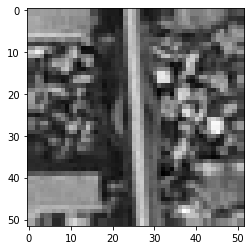

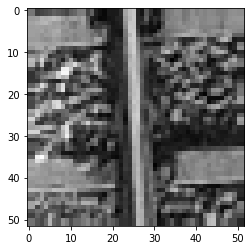

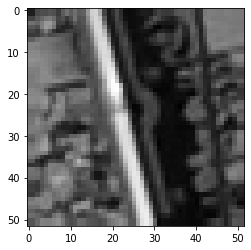

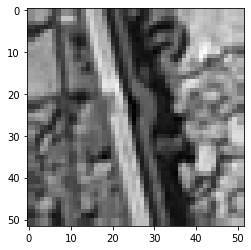

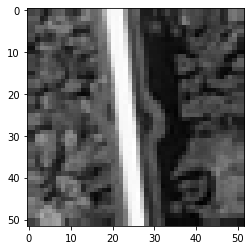

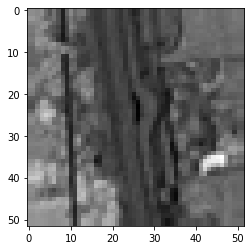

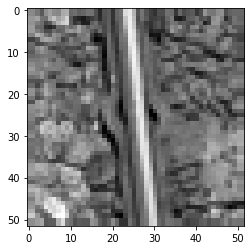

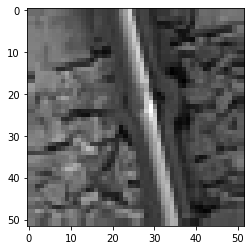

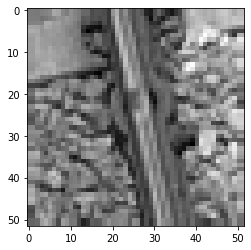

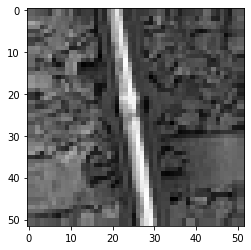

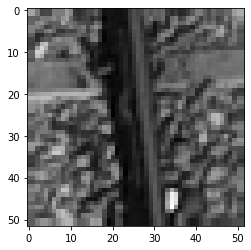

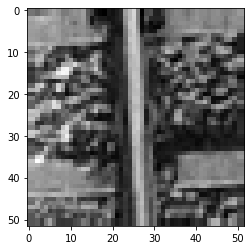

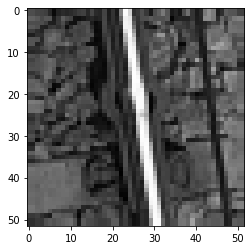

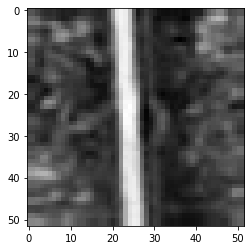

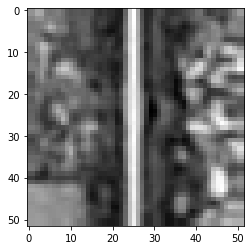

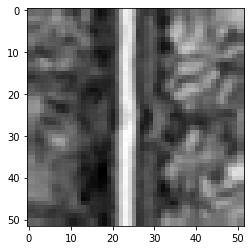

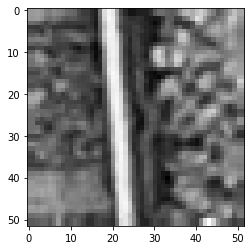

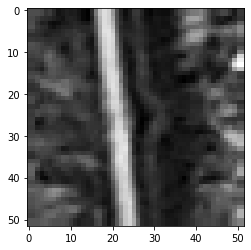

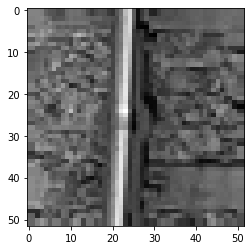

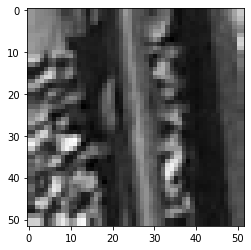

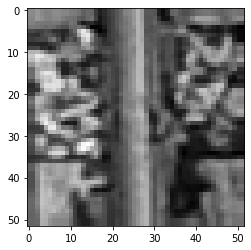

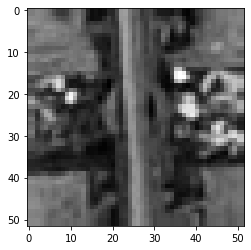

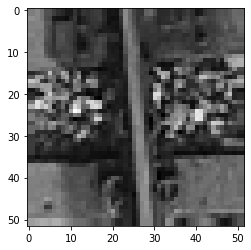

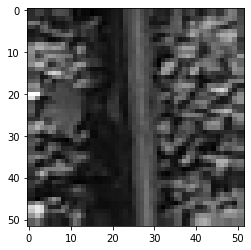

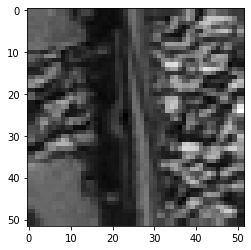

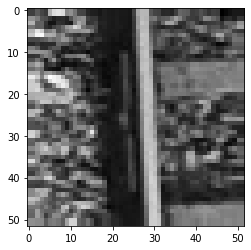

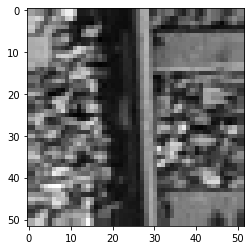

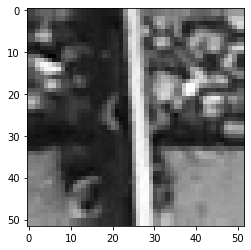

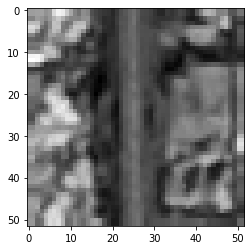

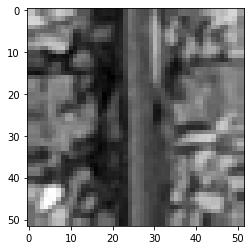

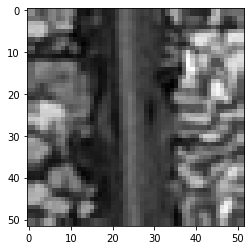

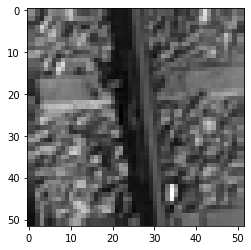

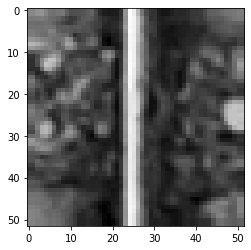

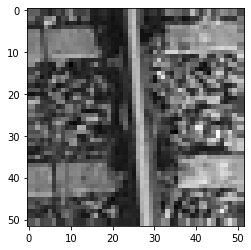

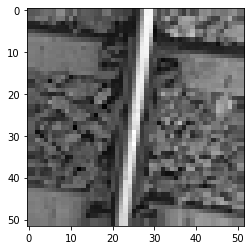

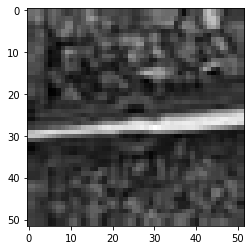

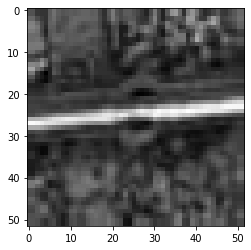

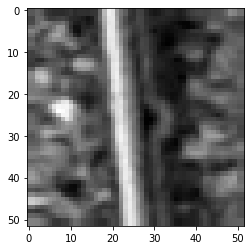

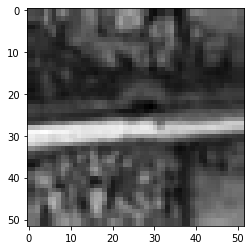

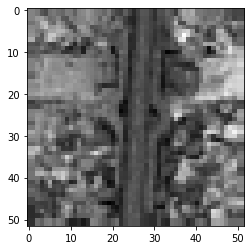

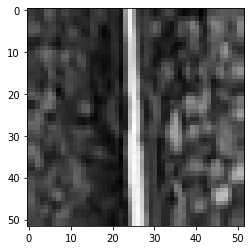

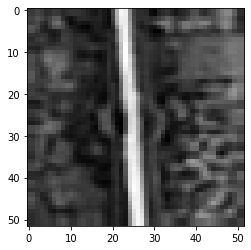

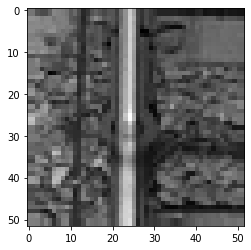

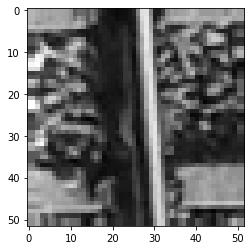

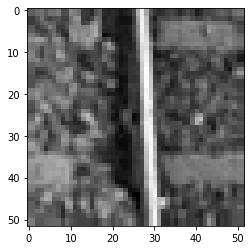

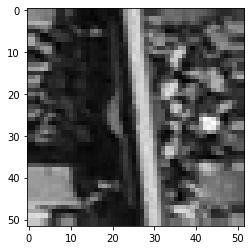

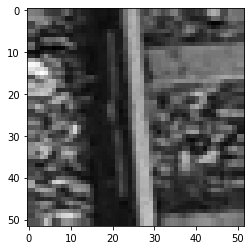

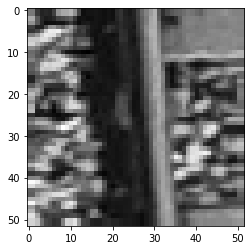

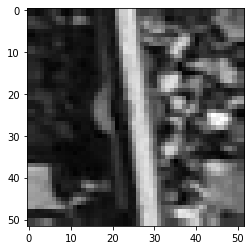

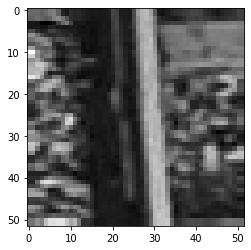

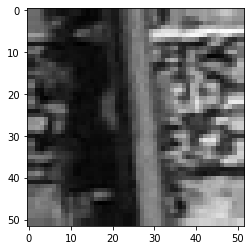

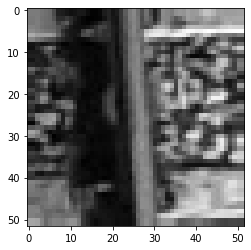

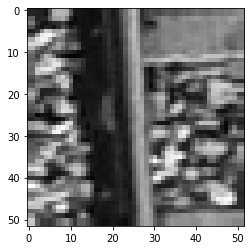

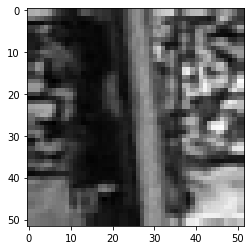

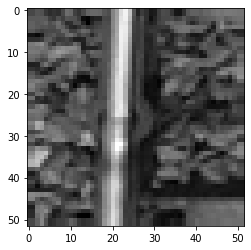

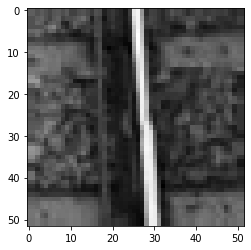

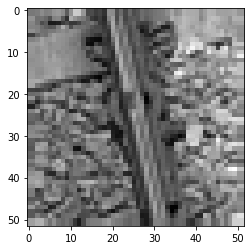

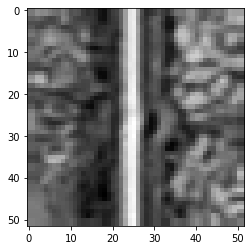

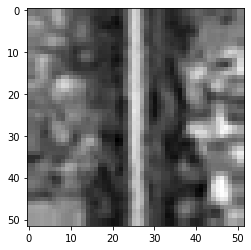

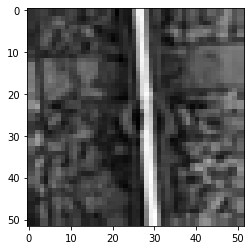

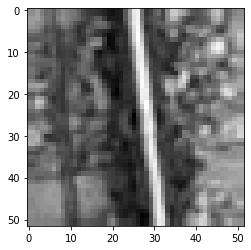

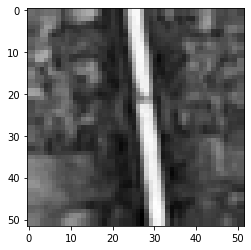

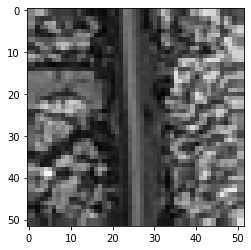

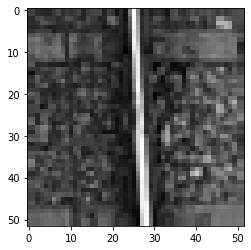

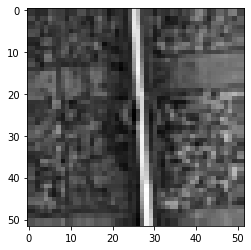

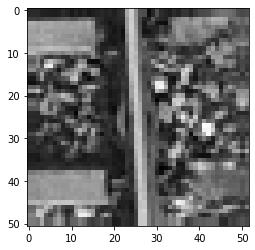

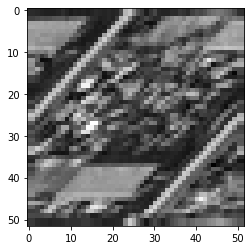

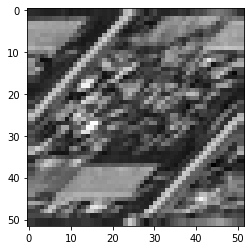

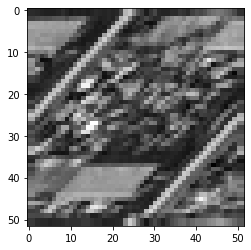

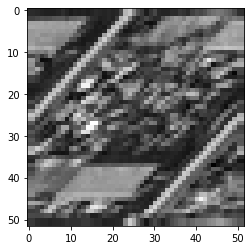

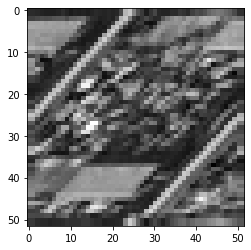

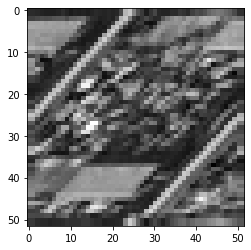

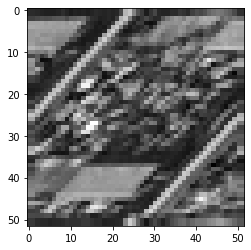

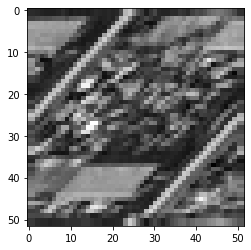

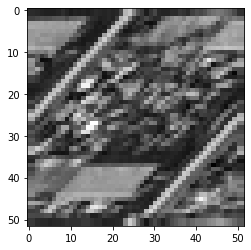

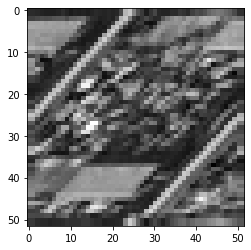

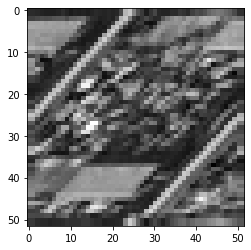

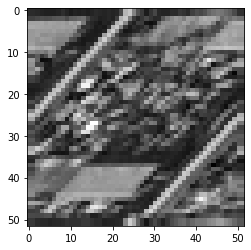

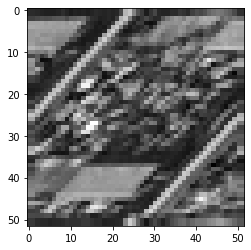

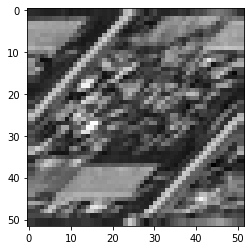

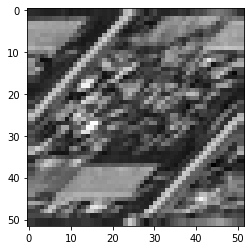

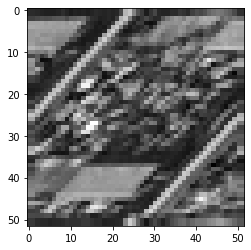

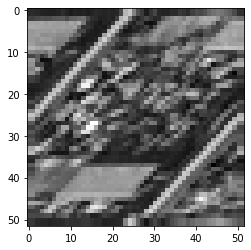

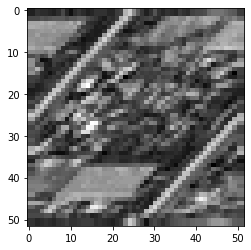

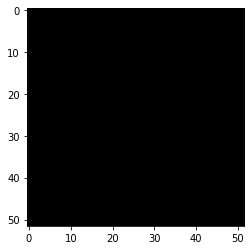

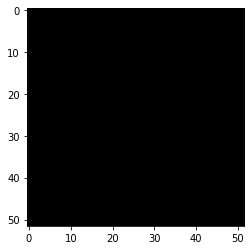

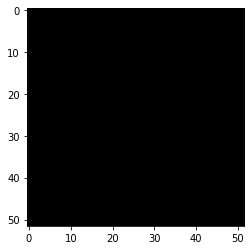

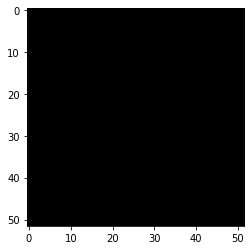

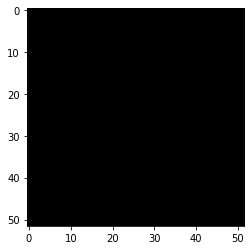

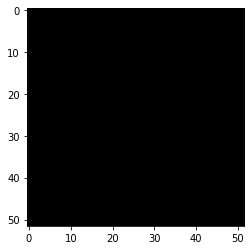

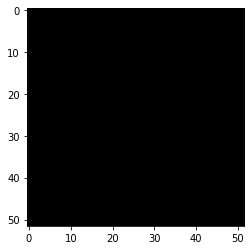

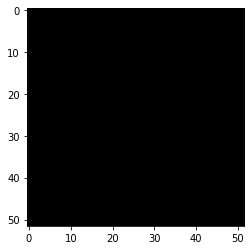

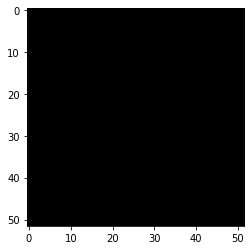

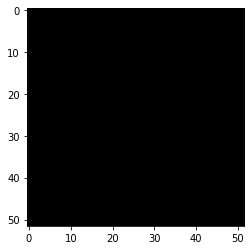

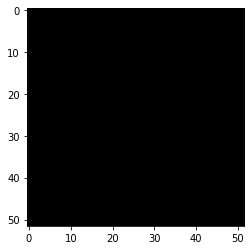

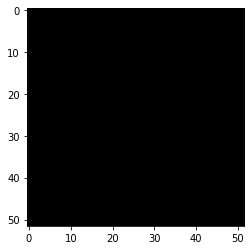

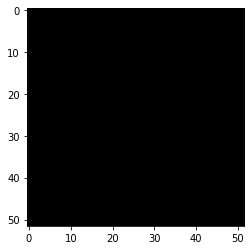

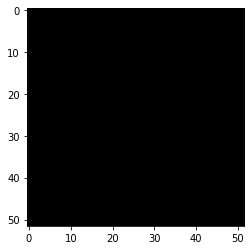

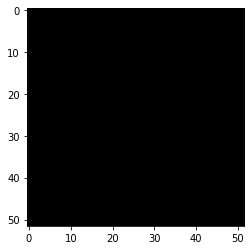

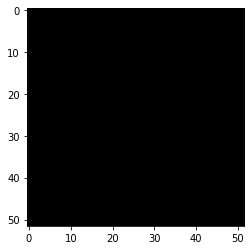

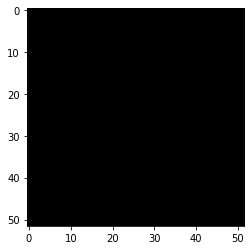

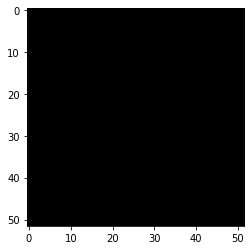

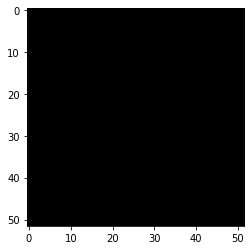

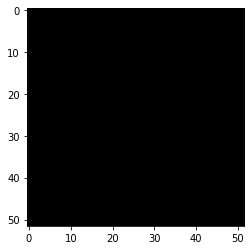

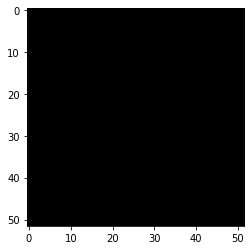

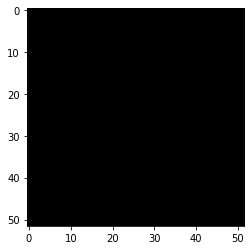

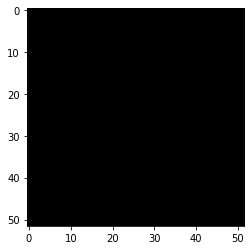

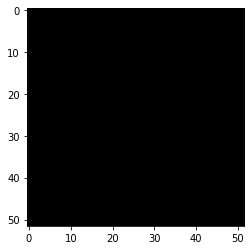

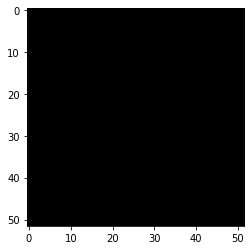

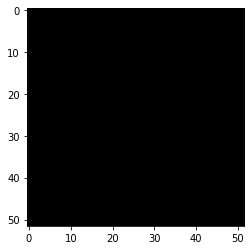

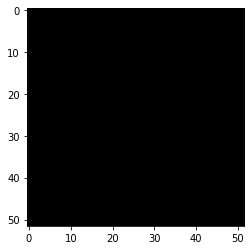

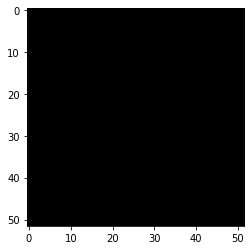

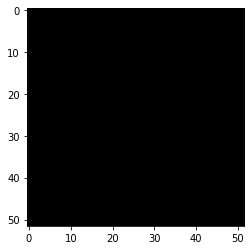

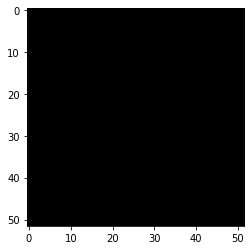

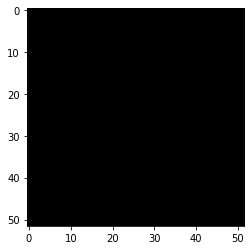

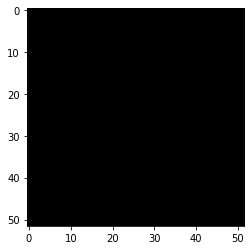

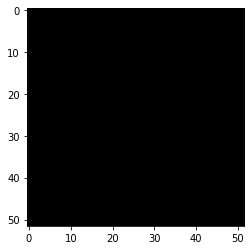

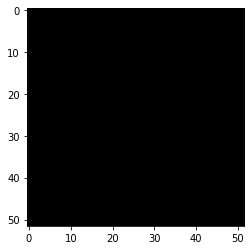

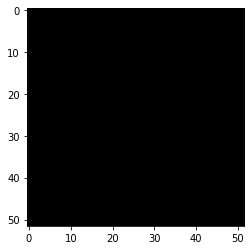

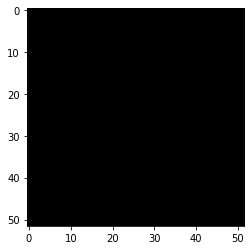

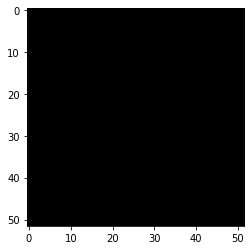

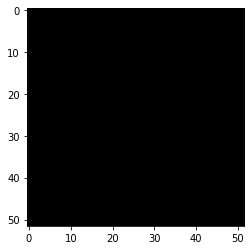

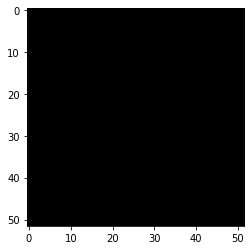

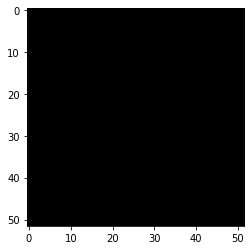

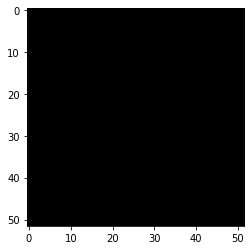

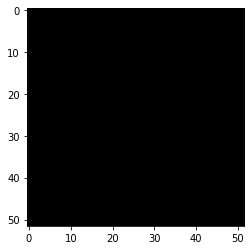

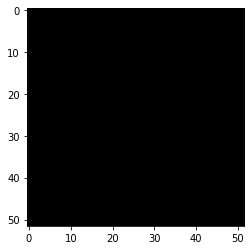

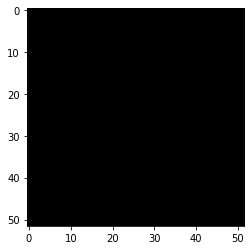

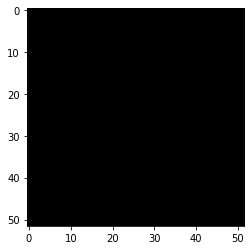

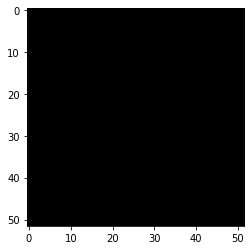

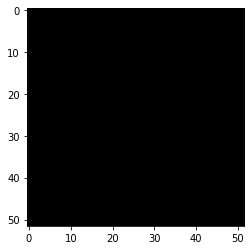

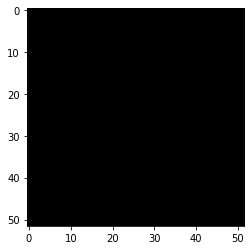

In [20]:
if __name__ == '__main__':
    posfeatures=[]
    h1=[]
    positive= 'C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/'
    for image_file in os.listdir(positive):
        image = mpimg.imread(os.path.join(positive,image_file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        image = np.float32(image)
        image /= 255

        coeffs2 = pywt.dwt2(image, 'bior1.3')
        LL, (LH, HL, HH) = coeffs2
        fig = plt.figure()
        for i, a in enumerate([LL]):
            ax = fig.add_subplot(1, 1, i + 1)
            ax.imshow(a, cmap=plt.cm.gray)
        image=np.resize(image,(100,100))        

#for negative examples
    negfeatures=[]
    h2=[]
    negative= 'C:/Users/hp/Desktop/Mod1-IITR/fishplate/neg/'
    for image_file1 in os.listdir(negative):
        image1 = mpimg.imread(os.path.join(negative,image_file1))
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

        image1 = np.float32(image)
        image1 /= 255

        coeffs2 = pywt.dwt2(image1, 'bior1.3')
        LL, (LH, HL, HH) = coeffs2
        fig = plt.figure()
        for i, a in enumerate([LL]):
            ax = fig.add_subplot(1, 1, i + 1)
            ax.imshow(a, cmap=plt.cm.gray)
        image1=np.resize(image1,(100,100))
    
svc = LinearSVC()
X_scaler = StandardScaler() 
X = np.vstack((fishplate_features, notfishplate_features))
	# Fit a per-column scaler
X_scaler.fit(X)
	# Apply the scaler to X
scaled_X = X_scaler.transform(X)

	# Define the labels vector
y = np.hstack((np.ones(len(fishplate_features)), np.zeros(len(notfishplate_features))))
rand_state = np.random.randint(0, 66)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=rand_state)
    # Check the training time for the SVC
time1=time.time()
svm_model_linear=svc.fit(X_train, y_train)
#svc.fit(X_train, y_train)
t2 = time.time()

print(round(t2-time1, 2), 'Seconds to train SVC...')
svm_predictions = svm_model_linear.predict(X_test)
svm_predictions = svc.predict(X_test)
print('Test Accuracy of SVC = ',svm_model_linear.score(X_test, y_test))  


imdir = 'C:/Users/hp/Desktop/Mod1-IITR/test/'
xcord=[]
ycord1=[]
(winW, winH) = (100,100)
for image_file in os.listdir(imdir):
    image2 = mpimg.imread(os.path.join(imdir, image_file))

    on_windows=[]
    pred=[]
    clone = image2.copy()

    for (x, y, window) in sliding_window(image2, stepSize=32, windowSize=(winW, winH)):  # loop over the sliding window for each layer of the pyramid
        if window.shape[0] != winH or window.shape[1] != winW: # if the window does not meet our desired window size, ignore it
            continue
        windowstestfeat = search_windowfeature(window)
        testfeaturesh = X_scaler.transform(windowstestfeat) 
        prediction =svm_model_linear.predict(testfeaturesh) 
        pred.append(prediction)
        if prediction==1:
            on_windows.append(window)
            xcord.append(x)
            ycord1.append(y) 
            cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
            cv2.imshow("Window",clone)
        k=cv2.waitKey(1)
        
        time.sleep(0.025)